# Trabajo Práctico 3 - Big Data, Aprendizaje y Minería de Datos


## Grupo: 

* Alexander Pacheco
* Rafael Paganini
* Alan Starobinski

## Parte I: Análisis de la base de hogares y cálculo de pobreza

In [1]:
# Se importan los paquetes y comandos necesarios para trabajar con metodologías de clasificación

import os  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import statsmodels.api as sm
import sklearn
import statistics
import time
import IPython
import warnings

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from matplotlib.image import imread

In [2]:
# Definimos el directorio

#os.chdir(r'C:\Users\alans\OneDrive\Documents\TP Ridge Lasso')
os.chdir(r'C:\Users\Rafael\Desktop\Cosas\Encare\Master UdeSA\Tercer trimestre\Big Data\TPs\TP3')
#os.chdir('/Users/alexanderpacheco/Desktop/Mecon_udesa/big_data/TPS/TP3')



In [3]:
a = time.time()


### Inciso 1


#### PENSAR TEXTO Y CAMBIAR EL RESTO DEL CÓDIGO EN FUNCIÓN DE LAS VARIABLES QUE PONGAMOS

### Inciso 2

In [4]:
# Descargamos la EPH a nivel de hogar
df_eph_hog = pd.read_excel("usu_hogar_T123.xlsx")
df_eph_hog.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPSRHJMKNCDEHLEH00797939,2023,1,1,1,40,N,25,111,2,...,NaN,3.0,3,124,1,2,98,0,0,0
1,TQRMNORQYHLMKPCDEHLEH00717341,2023,1,1,1,40,N,25,150,1,...,NaN,5.0,7,193,2,0,98,0,0,0
2,TQRMNOPUWHLLKSCDEHLEH00798181,2023,1,1,1,40,N,25,156,2,...,NaN,5.0,6,185,1,0,98,0,0,0
3,TQRMNOSSWHKOKRCDEGOIH00778157,2023,1,1,1,40,N,18,229,1,...,NaN,2.0,2,228,2,0,1,0,0,0
4,TQRMNORPUHJMKSCDEGOIH00794685,2023,1,1,1,40,N,18,182,1,...,NaN,5.0,6,194,1,0,97,0,0,0


In [5]:
print('La muestra completa contiene', len(df_eph_hog), 'observaciones')

La muestra completa contiene 16815 observaciones


In [6]:
# Nos quedamos con las observaciones de Ciudad Autónoma de Buenos Aires y Gran Buenos Aires
df_ba_hog = df_eph_hog[(df_eph_hog['AGLOMERADO'] == 32) | (df_eph_hog['AGLOMERADO'] == 33)]
print('Ahora tenemos', len(df_ba_hog), 'observaciones.')

Ahora tenemos 2736 observaciones.


### Inciso 3

In [7]:
# Descargamos la EPH a nivel individual
df_eph_ind = pd.read_excel("usu_individual_T123.xlsx")
df_eph_ind.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNORVWHLMKOCDEOHCH00720228,2023,1,1,5,0,44,N,91,112,...,10.0,9,79700.0,6,6.0,5,NaN,7.0,5,133
1,TQRMNOPSTHKMKPCDEOHCH00781447,2023,1,1,1,1,44,N,91,190,...,6.0,5,180000.0,9,10.0,9,NaN,10.0,9,200
2,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,1,1,44,N,91,134,...,8.0,8,145000.0,9,9.0,8,NaN,9.0,8,140
3,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,2,1,44,N,91,134,...,8.0,8,145000.0,9,9.0,8,NaN,9.0,8,140
4,TQRMNOQYTHMNKSCDEOHCH00803178,2023,1,1,1,1,44,N,91,120,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0


In [8]:
print('La base completa de individuos contiene', len(df_eph_hog), 'observaciones')

La base completa de individuos contiene 16815 observaciones


In [9]:
# Nos quedamos con las observaciones de Ciudad Autónoma de Buenos Aires y Gran Buenos Aires
df_ba_ind = df_eph_ind[(df_eph_ind['AGLOMERADO'] == 32) | (df_eph_ind['AGLOMERADO'] == 33)]
print('Ahora la base de individuos tiene', len(df_ba_ind), 'observaciones.')

Ahora la base de individuos tiene 7619 observaciones.


In [10]:
# Mergeamos ambas bases
df_eph = df_ba_hog.merge(df_ba_ind,on=['CODUSU', 'NRO_HOGAR'], how='left', suffixes=('', '_ind'))
df_eph.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,PDECIFR_ind,ADECIFR_ind,IPCF_ind,DECCFR_ind,IDECCFR_ind,RDECCFR_ind,GDECCFR_ind,PDECCFR_ind,ADECCFR_ind,PONDIH_ind
0,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,33,1066,1,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
1,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,33,1066,1,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,33,2270,2,...,NaN,5,79000.0,6,NaN,6,6.0,NaN,7,4733
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,33,2270,2,...,NaN,5,79000.0,6,NaN,6,6.0,NaN,7,4733
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,S,33,2161,1,...,NaN,3,96000.0,7,NaN,7,7.0,NaN,8,2672


In [11]:
#Sabemos que hay columnas repetidas entre ambos archivos Excel

print(df_eph)

                             CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  REALIZADA  \
0     TQRMNORVYHMOTSCDEIJAH00802517  2023          1          1          1   
1     TQRMNORVYHMOTSCDEIJAH00802517  2023          1          1          1   
2     TQRMNOSQRHLLTTCDEIJAH00719390  2023          1          1          1   
3     TQRMNOSQRHLLTTCDEIJAH00719390  2023          1          1          1   
4     TQSMNOSQRHLLTTCDEIJAH00719389  2023          1          1          1   
...                             ...   ...        ...        ...        ...   
7614  TQRMNOSSQHKOOMCDEIJAH00802644  2023          1          1          1   
7615  TQRMNOSSQHKOOMCDEIJAH00802644  2023          1          1          1   
7616  TQRMNOSSQHKOOMCDEIJAH00802644  2023          1          1          1   
7617  TQRMNORYPHJKNPCDEIJAH00794297  2023          1          1          1   
7618  TQRMNORYPHJKNPCDEIJAH00794297  2023          1          1          1   

      REGION MAS_500  AGLOMERADO  PONDERA  IV1  ... PDECIFR_ind

In [12]:
#Conocemos cuales son las repetidas

columnas_duplicadas = []

for columna in df_eph.columns:
    if columna.endswith("_ind"):
        columna_sin_sufijo = columna.rstrip("_ind")
        if columna_sin_sufijo in df_eph.columns:
            if (df_eph[columna] == df_eph[columna_sin_sufijo]).all():
                columnas_duplicadas.append((columna_sin_sufijo, columna))

if columnas_duplicadas:
    print("Columnas con contrapartes _ind que son iguales:")
    for dupla in columnas_duplicadas:
        print(f"{dupla[0]} y {dupla[1]} son iguales.")
else:
    print("No hay columnas con contrapartes _ind iguales.")

Columnas con contrapartes _ind que son iguales:
ANO4 y ANO4_ind son iguales.
TRIMESTRE y TRIMESTRE_ind son iguales.
REGION y REGION_ind son iguales.
MAS_500 y MAS_500_ind son iguales.
AGLOMERADO y AGLOMERADO_ind son iguales.
PONDERA y PONDERA_ind son iguales.
ITF y ITF_ind son iguales.
DECIFR y DECIFR_ind son iguales.
RDECIFR y RDECIFR_ind son iguales.
GDECIFR y GDECIFR_ind son iguales.
ADECIFR y ADECIFR_ind son iguales.
IPCF y IPCF_ind son iguales.
DECCFR y DECCFR_ind son iguales.
RDECCFR y RDECCFR_ind son iguales.
GDECCFR y GDECCFR_ind son iguales.
ADECCFR y ADECCFR_ind son iguales.
PONDIH y PONDIH_ind son iguales.


In [13]:
# Probamos un ejemplo de las repetidas

df_eph['TRIMESTRE'].equals(df_eph['TRIMESTRE_ind'])

True

In [14]:
# Elimina las columnas duplicadas con el sufijo "_ind"
for dupla in columnas_duplicadas:
    columna_sin_sufijo = dupla[0]
    columna_con_sufijo = dupla[1]
    df_eph.drop(columns=columna_con_sufijo, inplace=True)

print("Columnas duplicadas eliminadas.")

Columnas duplicadas eliminadas.


In [15]:
#Ahora vemos que hay menos cantidad de columnas porque eliminamos correctamente las repetidas, antes teníamos 263
#Ahora tenemos 246


print(df_eph)


                             CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  REALIZADA  \
0     TQRMNORVYHMOTSCDEIJAH00802517  2023          1          1          1   
1     TQRMNORVYHMOTSCDEIJAH00802517  2023          1          1          1   
2     TQRMNOSQRHLLTTCDEIJAH00719390  2023          1          1          1   
3     TQRMNOSQRHLLTTCDEIJAH00719390  2023          1          1          1   
4     TQSMNOSQRHLLTTCDEIJAH00719389  2023          1          1          1   
...                             ...   ...        ...        ...        ...   
7614  TQRMNOSSQHKOOMCDEIJAH00802644  2023          1          1          1   
7615  TQRMNOSSQHKOOMCDEIJAH00802644  2023          1          1          1   
7616  TQRMNOSSQHKOOMCDEIJAH00802644  2023          1          1          1   
7617  TQRMNORYPHJKNPCDEIJAH00794297  2023          1          1          1   
7618  TQRMNORYPHJKNPCDEIJAH00794297  2023          1          1          1   

      REGION MAS_500  AGLOMERADO  PONDERA  IV1  ... V11_M  V12_

In [16]:
print('Ahora tenemos', len(df_eph), 'observaciones.')

Ahora tenemos 7619 observaciones.


### Inciso 4

Aquí se definirán las funciones que serán necesarias para la limpieza de la base de datos. A continuación se listarán las funciones de cada paquete:
* **Pandas**: .isna, .drop, 
* **Numpy**: .random
* **Numpy**: .random


In [17]:
# Se eliminan las variables para las que el porcentaje de valores faltantes supera al 50% de la muestra

# Se calcula el porcentaje de valores faltantes para cada variable
porc_missing = (df_eph.isna().mean() * 100)

# Se indexan las variables con un porcentaje de valores faltantes superior a 50%
se_dropean_3 = porc_missing[porc_missing > 50].index

# Se eliminan esas variables
df_eph = df_eph.drop(se_dropean_3, axis=1)

# Lista de variables incluidas
column_names = df_eph.columns.tolist()
print(column_names)

df_eph.to_excel('df_eph_v1.xlsx', index=False)

['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV2', 'IV3', 'IV4', 'IV5', 'IV6', 'IV7', 'IV8', 'IV9', 'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7', 'II8', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF', 'DECIFR', 'RDECIFR', 'GDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'RDECCFR', 'GDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4', 'COMPONENTE', 'H15', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH15', 'CH16', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'P21', 'DECOCUR', 'RDECOCUR', 'GDECOCUR', '

In [18]:
# Se eliminan las edades negativas de la base
df_eph = df_eph[df_eph['CH06'] >= 0]


# Se toman solo las observaciones mayores a cero de los ingresos de la ocupación principal de los asalariados

df_eph = df_eph[df_eph['ITF'] >= 0]
df_eph = df_eph[df_eph['IPCF'] >= 0]

# Se toman solo las observaciones mayores a cero de los ingresos no laborales

df_eph = df_eph[df_eph['V2_M'] >= 0]
df_eph = df_eph[df_eph['V3_M'] >= 0]
df_eph = df_eph[df_eph['V4_M'] >= 0]
df_eph = df_eph[df_eph['V5_M'] >= 0]
df_eph = df_eph[df_eph['V8_M'] >= 0]
df_eph = df_eph[df_eph['V9_M'] >= 0]
df_eph = df_eph[df_eph['V10_M'] >= 0]
df_eph = df_eph[df_eph['V11_M'] >= 0]
df_eph = df_eph[df_eph['V12_M'] >= 0]
df_eph = df_eph[df_eph['V18_M'] >= 0]
df_eph = df_eph[df_eph['V19_AM'] >= 0]
df_eph = df_eph[df_eph['V21_M'] >= 0]
df_eph = df_eph[df_eph['T_VI'] >= 0]


print('Ahora tenemos', len(df_eph), 'observaciones')


Ahora tenemos 7140 observaciones


In [19]:
# Se corrobora que ya no quedan valores faltantes relevantes

# Se fija la opción para poder visualizar toda la lista de variables restantes al final de la celda
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Cuenta los valores faltantes para cada variable Count missing values for each variable in the DataFrame 'respondieron'
missing = df_eph.isna().sum()

# Display the missing value counts
print(missing)

# Se deshace la opción que fuerza a no omitir valores de las cosas que se muestran
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

#Solo nos quedó P4T7 con 23 missings, y será eliminadaa en la Parte III por ser de ingreso

CODUSU         0
ANO4           0
TRIMESTRE      0
NRO_HOGAR      0
REALIZADA      0
REGION         0
MAS_500        0
AGLOMERADO     0
PONDERA        0
IV1            0
IV2            0
IV3            0
IV4            0
IV5            0
IV6            0
IV7            0
IV8            0
IV9            0
IV10           0
IV11           0
IV12_1         0
IV12_2         0
IV12_3         0
II1            0
II2            0
II3            0
II3_1          0
II4_1          0
II4_2          0
II4_3          0
II5            0
II5_1          0
II6            0
II6_1          0
II7            0
II8            0
II9            0
V1             0
V2             0
V21            0
V22            0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19_A          0
V19_B         

In [20]:
print(df_eph.dtypes)

CODUSU       object
ANO4          int64
TRIMESTRE     int64
NRO_HOGAR     int64
REALIZADA     int64
              ...  
V12_M         int64
V18_M         int64
V19_AM        int64
V21_M         int64
T_VI          int64
Length: 135, dtype: object


In [21]:
# Vamos a copiar el dataframe original

df_eph_copy = df_eph.copy()

In [22]:
# Queremos ver ahora el tema de outliers
# Aquí creamos un ejemplo con datos aleatorios
data = {
    'ITF': np.random.normal(0, 1, 100),
    'IPCF': np.random.normal(0, 1, 100),
    'V2_M': np.random.normal(0, 1, 100),
    'V3_M': np.random.normal(0, 1, 100),
    'V4_M': np.random.normal(0, 1, 100),
    'V5_M': np.random.normal(0, 1, 100),
    'V8_M': np.random.normal(0, 1, 100),
    'V9_M': np.random.normal(0, 1, 100),
    'V10_M': np.random.normal(0, 1, 100),
    'V11_M': np.random.normal(0, 1, 100),
    'V18_M': np.random.normal(0, 1, 100),
    'V19_AM': np.random.normal(0, 1, 100),
    'V21_M': np.random.normal(0, 1, 100),
    'T_VI': np.random.normal(0, 1, 100),
    'V2_M': np.random.normal(0, 1, 100),
    'CH06': np.random.normal(0, 1, 100),
}

df_eph_copy = pd.DataFrame(data)

# Función para identificar outliers en una columna
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Calcular outliers para cada variable en el DataFrame
outliers_count = {}
for column in df_eph_copy.columns:
    outliers = identify_outliers(df_eph_copy[column])
    outliers_count[column] = outliers.sum()

print("Número de outliers por variable:")
print(outliers_count)

# Para variables relevantes vemos que ITF y edad tienen pocos valores outliers
# Decidimos no eliminar los outliers porque los valores altos/bajos de ingresos y edad son realistas 

Número de outliers por variable:
{'ITF': 3, 'IPCF': 6, 'V2_M': 1, 'V3_M': 1, 'V4_M': 0, 'V5_M': 1, 'V8_M': 0, 'V9_M': 3, 'V10_M': 2, 'V11_M': 3, 'V18_M': 4, 'V19_AM': 1, 'V21_M': 0, 'T_VI': 0, 'CH06': 0}


In [23]:
# Seguimos con el dataframe original

print(df_eph.dtypes)

CODUSU       object
ANO4          int64
TRIMESTRE     int64
NRO_HOGAR     int64
REALIZADA     int64
              ...  
V12_M         int64
V18_M         int64
V19_AM        int64
V21_M         int64
T_VI          int64
Length: 135, dtype: object


In [24]:
df_eph.info(verbose=True)
print("All object, int64 or float64, table:")
df_eph.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7140 entries, 0 to 7618
Data columns (total 135 columns):
 #    Column      Dtype  
---   ------      -----  
 0    CODUSU      object 
 1    ANO4        int64  
 2    TRIMESTRE   int64  
 3    NRO_HOGAR   int64  
 4    REALIZADA   int64  
 5    REGION      int64  
 6    MAS_500     object 
 7    AGLOMERADO  int64  
 8    PONDERA     int64  
 9    IV1         int64  
 10   IV2         int64  
 11   IV3         int64  
 12   IV4         int64  
 13   IV5         int64  
 14   IV6         int64  
 15   IV7         int64  
 16   IV8         int64  
 17   IV9         int64  
 18   IV10        int64  
 19   IV11        int64  
 20   IV12_1      int64  
 21   IV12_2      int64  
 22   IV12_3      int64  
 23   II1         int64  
 24   II2         int64  
 25   II3         int64  
 26   II3_1       int64  
 27   II4_1       int64  
 28   II4_2       int64  
 29   II4_3       int64  
 30   II5         int64  
 31   II5_1       int64  
 32   II

int64      125
float64      7
object       3
dtype: int64

In [25]:
excep_noresponde_9 = ['CH03', 'CH12', 'CH14', 'PP04C','PP04G', 'PP11C', 'PP11O', 'II1' 'II2' 'IX_TOT' 'IX_MEN10' 'IX_MAYEQ10' 'CH05','CODUSU', 'ANO4','TRIMESTRE',
                'NRO_HOGAR','COMPONENTE','MAS_500','REGION','PONDERA', 'PONDIH'
                'PONDII','PONDIIO', 'CH06']
for var in df_eph.columns:
    if var not in excep_noresponde_9:
        #df_eph = df_eph[df_eph[var] != 9]
        df_eph[var] = df_eph[var].replace(9, 0)


In [26]:
excep_noresponde_99 = ['II1' 'II2' 'IX_TOT' 'IX_MEN10' 'IX_MAYEQ10' 'CH05','CODUSU', 'ANO4','TRIMESTRE',
                'NRO_HOGAR','COMPONENTE','MAS_500','REGION','PONDERA', 'PONDIH'
                'PONDII','PONDIIO', 'CH06']
for var in df_eph.columns:
    if var not in excep_noresponde_99:
        #df_eph = df_eph[df_eph[var] != 99]
        df_eph[var] = df_eph[var].replace(9, 0)

In [27]:
print(len(df_eph))

7140


Se convertirá las variables categóricas a dummies

In [28]:
exc_var_list0 = ['II1', 'II2', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'CH05','CODUSU', 'ANO4','TRIMESTRE',
                'NRO_HOGAR','COMPONENTE','MAS_500','REGION','PONDERA', 'PONDIH',
                'PONDII','PONDIIO','CH06','REALIZADA']
# respondieron = respondieron.drop(columns=['CH05','CODUSU', 'ANO4','TRIMESTRE','NRO_HOGAR','COMPONENTE','REALIZADA','MAS_500','REGION','Sexo','Edad','id_hogar','PONDERA','PONDII','PONDIIO'])
exc_var_list1 = ['V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V21_M', 'T_VI', 'P47T',
                 'TOT_P12', 'P21', 'IPCF', 'ITF']
exc_var_list = exc_var_list0 + exc_var_list1

In [30]:
print(df_eph.columns)

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1',
       ...
       'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V19_AM',
       'V21_M', 'T_VI'],
      dtype='object', length=135)


In [31]:
def cat_a_dum (exc_var_list, data_frame):
    
    data_frame_new = data_frame
    
    # For loop que crea variables dummy, elimina una y elimina la variable original
    for column in data_frame.columns:
        
        #Excluye las de exc_var_list
        if column not in exc_var_list:
            # Genera dataframe con las dummies, eliminando la primera
            dummies = pd.get_dummies(data_frame_new[column], prefix=column, drop_first=True)

            # Las añade a la base
            data_frame_new = pd.concat([data_frame_new, dummies], axis=1)
           
            # Borra la variable original
            data_frame_new.drop(column, axis=1, inplace=True)            
            
    return data_frame_new

In [32]:
# Se construye un dataframe aparte con las variables a analizar en el Inciso 5
df_eph_inc_6 = df_eph[['CH06','NIVEL_ED','ESTADO','CH04','AGLOMERADO']].copy()

In [33]:
# Se convierten a (conjuntos de) dummies todas las variables categóricas
df_eph = cat_a_dum(exc_var_list,df_eph)


### Inciso 6

In [34]:
print('Edad')
df_eph_inc_6['CH06'].describe(include='all')

Edad


count    7140.000000
mean       36.004342
std        22.010290
min         1.000000
25%        17.000000
50%        34.000000
75%        52.000000
max        99.000000
Name: CH06, dtype: float64

#### Texto edad

In [35]:
print('Nivel educativo')
df_eph_inc_6['NIVEL_ED'].value_counts(sort=False, dropna=False)

Nivel educativo


4    1576
5     849
2     828
1     915
3    1508
6    1008
7     456
Name: NIVEL_ED, dtype: int64

#### Texto NIVEL EDUCATIVO

In [36]:
print('Condición de actividad')
df_eph_inc_6['ESTADO'].value_counts(sort=False, dropna=False)

Condición de actividad


1    3397
3    2545
2     274
4     901
0      23
Name: ESTADO, dtype: int64

#### Texto ESTADO

In [37]:
print('Género')
df_eph_inc_6['CH04'].value_counts(sort=False, dropna=False)

Género


2    3666
1    3474
Name: CH04, dtype: int64

#### Texto GÉNERO

In [38]:
print('CABA vs. GBA')
df_eph_inc_6['AGLOMERADO'].value_counts(sort=False, dropna=False)

CABA vs. GBA


33    5542
32    1598
Name: AGLOMERADO, dtype: int64

#### Texto AGLOMERADO

In [39]:
# Tabla que resume todo lo anterior
variables_describir = ['CH06','NIVEL_ED','ESTADO','CH04','AGLOMERADO']
summary = df_eph_inc_6[variables_describir].describe(include='all')
print(summary)

              CH06     NIVEL_ED       ESTADO         CH04   AGLOMERADO
count  7140.000000  7140.000000  7140.000000  7140.000000  7140.000000
mean     36.004342     3.765266     2.126611     1.513445    32.776190
std      22.010290     1.741310     1.154996     0.499854     0.416825
min       1.000000     1.000000     0.000000     1.000000    32.000000
25%      17.000000     3.000000     1.000000     1.000000    33.000000
50%      34.000000     4.000000     2.000000     2.000000    33.000000
75%      52.000000     5.000000     3.000000     2.000000    33.000000
max      99.000000     7.000000     4.000000     2.000000    33.000000


### Inciso 7

In [40]:
# Se importa la base 'tabla_adulto_equiv.xlsx' para luego unirla a la base principal

df_adult_eq = pd.read_excel("tabla_adulto_equiv.xlsx", header=3, usecols="A:C", nrows=25)
df_adult_eq

,Edad,Mujeres,Varones
0,NaN,NaN,NaN
1,Menor de 1 año,0.35,0.35
2,1año,0.37,0.37
3,2 años,0.46,0.46
4,3 años,0.51,0.51
5,4 años,0.55,0.55
6,5 años,0.60,0.60
7,6 años,0.64,0.64
8,7 años,0.66,0.66
9,8 años,0.68,0.68


In [41]:
# Se reemplaza '1año' por '1 año' en la variable 'Edad' para que se pueda hacer un merge adecuado
df_adult_eq['Edad'] = df_adult_eq['Edad'].replace('1año', '1 año')
# Se elimina el único missing de la base debido al formato tabla en Excel
df_adult_eq = df_adult_eq.dropna(subset=['Edad'])
# Se elimina aquellos que tengan menos de 1 año debido a que no se tienen observaciones con esta característica
# en la base principal
df_adult_eq = df_adult_eq[df_adult_eq['Edad'] != "Menor de 1 año"]

In [42]:
# Se transforma la base a un formato long para que se pueda hacer un merge adecuado con la base principal
# para utilizar el sexo y la edad como variables identificadoras
df_adult_eq = pd.melt(df_adult_eq, id_vars=['Edad'], value_vars=['Varones', 'Mujeres'], var_name='Sexo')

In [43]:
# Se crea una nueva columna con el mismo nombre y formato que la base principal para poder hacer el merge
df_adult_eq.loc[df_adult_eq['Sexo'] == "Varones", 'CH04_2'] = 0
df_adult_eq.loc[df_adult_eq['Sexo'] == "Mujeres", 'CH04_2'] = 1
df_adult_eq['CH04_2'] = df_adult_eq['CH04_2'].astype('int64')
# Se renombra la variable 'value' a 'adulto_equiv'
df_adult_eq = df_adult_eq.rename(columns={'value': 'adulto_equiv'})

df_adult_eq

,Edad,Sexo,adulto_equiv,CH04_2
0,1 año,Varones,0.37,0
1,2 años,Varones,0.46,0
2,3 años,Varones,0.51,0
3,4 años,Varones,0.55,0
4,5 años,Varones,0.60,0
5,6 años,Varones,0.64,0
6,7 años,Varones,0.66,0
7,8 años,Varones,0.68,0
8,9 años,Varones,0.69,0
9,10 años,Varones,0.79,0


In [44]:
# Se genera la variable Edad en la base de datos df_eph
conditions = [
    (df_eph['CH06'] == 1),
    (df_eph['CH06'] == 2),
    (df_eph['CH06'] == 3),
    (df_eph['CH06'] == 4),
    (df_eph['CH06'] == 5),
    (df_eph['CH06'] == 6),
    (df_eph['CH06'] == 7),
    (df_eph['CH06'] == 8),
    (df_eph['CH06'] == 9),
    (df_eph['CH06'] == 10),
    (df_eph['CH06'] == 11),
    (df_eph['CH06'] == 12),
    (df_eph['CH06'] == 13),
    (df_eph['CH06'] == 14),
    (df_eph['CH06'] == 15),
    (df_eph['CH06'] == 16),
    (df_eph['CH06'] == 17),
    (df_eph['CH06'].between(18, 29, inclusive='both')),
    (df_eph['CH06'].between(30, 45, inclusive='both')),
    (df_eph['CH06'].between(46, 60, inclusive='both')),
    (df_eph['CH06'].between(61, 75, inclusive='both')),
    (df_eph['CH06'].between(76, 99, inclusive='both'))
]

values = [
    "1 año",
    "2 años",
    "3 años",
    "4 años",
    "5 años",
    "6 años",
    "7 años",
    "8 años",
    "9 años",
    "10 años",
    "11 años",
    "12 años",
    "13 años",
    "14 años",
    "15 años",
    "16 años",
    "17 años",
    "18 a 29 años",
    "30 a 45 años",
    "46 a 60 años",
    "61 a 75 años",
    "más de 75 años"
]

# Aplicar las condiciones y los valores a la nueva columna 'Edad'
df_eph['Edad'] = np.select(conditions, values, default='')

In [45]:
print(df_eph.columns.tolist())

['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION', 'MAS_500', 'PONDERA', 'II1', 'II2', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF', 'IPCF', 'PONDIH', 'COMPONENTE', 'CH05', 'CH06', 'P21', 'PONDIIO', 'TOT_P12', 'P47T', 'PONDII', 'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V21_M', 'T_VI', 'AGLOMERADO_33', 'IV1_2', 'IV1_3', 'IV1_4', 'IV1_6', 'IV2_1', 'IV2_2', 'IV2_3', 'IV2_4', 'IV2_5', 'IV2_6', 'IV2_7', 'IV2_8', 'IV2_99', 'IV3_2', 'IV3_3', 'IV3_4', 'IV4_1', 'IV4_2', 'IV4_3', 'IV4_4', 'IV4_5', 'IV4_6', 'IV4_7', 'IV5_2', 'IV6_2', 'IV6_3', 'IV7_2', 'IV7_3', 'IV7_4', 'IV8_2', 'IV9_1', 'IV9_2', 'IV10_1', 'IV10_2', 'IV10_3', 'IV11_1', 'IV11_2', 'IV11_3', 'IV11_4', 'IV12_1_2', 'IV12_2_2', 'IV12_3_2', 'II3_2', 'II4_1_1', 'II4_1_2', 'II4_2_1', 'II4_2_2', 'II4_3_1', 'II4_3_2', 'II5_2', 'II6_2', 'II7_1', 'II7_2', 'II7_3', 'II7_4', 'II7_5', 'II7_6', 'II7_7', 'II7_8', 'II8_1', 'II8_2', 'II8_3', 'II8_4', 'II9_1', 'II9_2', 'II9_3', 'II9_4', 'V1_1', 

In [46]:
# Realizamos el merge con la base principal
df_eph_equiv = pd.merge(df_eph, df_adult_eq, on=['Edad', 'CH04_2'], how='left')
df_eph_equiv

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,PONDERA,II1,II2,...,ADECINDR_5,ADECINDR_6,ADECINDR_7,ADECINDR_8,ADECINDR_10,ADECINDR_12,ADECINDR_13,Edad,Sexo,adulto_equiv
0,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,1066,4,2,...,0,0,0,0,0,1,0,46 a 60 años,Mujeres,0.76
1,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,1066,4,2,...,0,0,0,0,0,0,0,18 a 29 años,Mujeres,0.76
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,0,0,0,0,0,0,30 a 45 años,Varones,1.00
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,0,1,0,0,0,0,30 a 45 años,Mujeres,0.77
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,S,2161,3,1,...,0,1,0,0,0,0,0,más de 75 años,Mujeres,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,0,0,0,0,0,0,0,18 a 29 años,Mujeres,0.76
7136,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,0,0,0,0,0,0,0,13 años,Mujeres,0.76
7137,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,0,0,0,0,0,0,0,7 años,Varones,0.66
7138,TQRMNORYPHJKNPCDEIJAH00794297,2023,1,1,1,1,S,521,3,2,...,0,0,0,0,0,0,0,61 a 75 años,Mujeres,0.67


In [47]:
# Ahora se crea un data frame que contenga la suma de las necesidades energéticas de los miembros de cada hogar
ad_equiv_hogar = df_eph_equiv.groupby(['CODUSU', 'NRO_HOGAR'])['adulto_equiv'].sum().reset_index()
# Se cambia el nombre de la variable a 'ad_equiv_hogar'
ad_equiv_hogar = ad_equiv_hogar.rename(columns={'adulto_equiv':'ad_equiv_hogar'})
# Se realiza el merge con la base principal con las necesidades energéticas por hogar
df_eph_equiv = pd.merge(df_eph_equiv, ad_equiv_hogar, on=['CODUSU', 'NRO_HOGAR'], how='left')

df_eph_equiv

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,PONDERA,II1,II2,...,ADECINDR_6,ADECINDR_7,ADECINDR_8,ADECINDR_10,ADECINDR_12,ADECINDR_13,Edad,Sexo,adulto_equiv,ad_equiv_hogar
0,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,1066,4,2,...,0,0,0,0,1,0,46 a 60 años,Mujeres,0.76,1.52
1,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,1066,4,2,...,0,0,0,0,0,0,18 a 29 años,Mujeres,0.76,1.52
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,0,0,0,0,0,30 a 45 años,Varones,1.00,1.77
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,1,0,0,0,0,30 a 45 años,Mujeres,0.77,1.77
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,S,2161,3,1,...,1,0,0,0,0,0,más de 75 años,Mujeres,0.63,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,0,0,0,0,0,0,18 a 29 años,Mujeres,0.76,2.95
7136,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,0,0,0,0,0,0,13 años,Mujeres,0.76,2.95
7137,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,0,0,0,0,0,0,7 años,Varones,0.66,2.95
7138,TQRMNORYPHJKNPCDEIJAH00794297,2023,1,1,1,1,S,521,3,2,...,0,0,0,0,0,0,61 a 75 años,Mujeres,0.67,1.69


In [48]:
# Se crea una submuestra con los que respondieron sobre su ingreso total familiar
respondieron = df_eph_equiv.loc[df_eph_equiv['ITF'] != 0]
print(len(respondieron))

4181


In [49]:
respondieron.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,PONDERA,II1,II2,...,ADECINDR_6,ADECINDR_7,ADECINDR_8,ADECINDR_10,ADECINDR_12,ADECINDR_13,Edad,Sexo,adulto_equiv,ad_equiv_hogar
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,0,0,0,0,0,30 a 45 años,Varones,1.00,1.77
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,1,0,0,0,0,30 a 45 años,Mujeres,0.77,1.77
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,S,2161,3,1,...,1,0,0,0,0,0,más de 75 años,Mujeres,0.63,0.63
5,TQRMNORTUHKOQQCDEIJAH00780489,2023,1,1,1,1,S,3097,3,1,...,0,1,0,0,0,0,más de 75 años,Mujeres,0.63,0.63
6,TQRMNOUTRHKNQMCDEIJAH00802590,2023,1,1,1,1,S,2571,2,1,...,0,1,0,0,0,0,30 a 45 años,Varones,1.00,1.00


In [50]:
print(respondieron.columns)

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'PONDERA', 'II1', 'II2',
       ...
       'ADECINDR_6', 'ADECINDR_7', 'ADECINDR_8', 'ADECINDR_10', 'ADECINDR_12',
       'ADECINDR_13', 'Edad', 'Sexo', 'adulto_equiv', 'ad_equiv_hogar'],
      dtype='object', length=458)


In [51]:
# Ahora los que no respondieron
norespondieron = df_eph_equiv.loc[df_eph_equiv['ITF'] == 0]
print(len(norespondieron), 'personas no respondieron cuál es su ingreso total familiar')

2959 personas no respondieron cuál es su ingreso total familiar


In [52]:
# Agregamos la columna 'ingreso_necesario' la cual es resultado de multiplicar el valor de la Canasta Básica
# Total en GBA por las necesidades energéticas por hogar
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar']*57371.05
respondieron

C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\11768579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar']*57371.05


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,PONDERA,II1,II2,...,ADECINDR_7,ADECINDR_8,ADECINDR_10,ADECINDR_12,ADECINDR_13,Edad,Sexo,adulto_equiv,ad_equiv_hogar,ingreso_necesario
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,0,0,0,0,30 a 45 años,Varones,1.00,1.77,101546.7585
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,1,0,0,0,0,30 a 45 años,Mujeres,0.77,1.77,101546.7585
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,S,2161,3,1,...,0,0,0,0,0,más de 75 años,Mujeres,0.63,0.63,36143.7615
5,TQRMNORTUHKOQQCDEIJAH00780489,2023,1,1,1,1,S,3097,3,1,...,1,0,0,0,0,más de 75 años,Mujeres,0.63,0.63,36143.7615
6,TQRMNOUTRHKNQMCDEIJAH00802590,2023,1,1,1,1,S,2571,2,1,...,1,0,0,0,0,30 a 45 años,Varones,1.00,1.00,57371.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,0,0,0,0,0,18 a 29 años,Mujeres,0.76,2.95,169244.5975
7136,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,0,0,0,0,0,13 años,Mujeres,0.76,2.95,169244.5975
7137,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,0,0,0,0,0,7 años,Varones,0.66,2.95,169244.5975
7138,TQRMNORYPHJKNPCDEIJAH00794297,2023,1,1,1,1,S,521,3,2,...,0,0,0,0,0,61 a 75 años,Mujeres,0.67,1.69,96957.0745


In [53]:
respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\1131476788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)


### Inciso 10

In [54]:
# Identificamos pobres como en el TP2

pobres = (respondieron['pobre'] == 1).sum()
print('Se identificó a', pobres, 'personas pobres')

Se identificó a 1555 personas pobres


In [55]:
# Se crea una variable que identifica a los hogares, a partir de CODUSU (que identifica viviendas) y NRO_HOGAR (que identifica
# hogares dentro de una misma vivienda).
respondieron['id_hogar'] = respondieron['CODUSU'].astype(str) + '_' + respondieron['NRO_HOGAR'].astype(str)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\4117641682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['id_hogar'] = respondieron['CODUSU'].astype(str) + '_' + respondieron['NRO_HOGAR'].astype(str)


In [56]:
# Construimos otro dataset con un individuo por hogar
resp_hogares = respondieron.groupby('id_hogar').first().reset_index()
resp_hogares

,id_hogar,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,PONDERA,II1,...,ADECINDR_8,ADECINDR_10,ADECINDR_12,ADECINDR_13,Edad,Sexo,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,TQRMNOPPQHJNOPCDEIJAH00802435_1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,S,1667,5,...,1,0,0,0,46 a 60 años,Varones,1.00,3.54,203093.5170,0
1,TQRMNOPPQHKMQRCDEIJAH00780809_1,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,S,3577,2,...,0,0,0,0,30 a 45 años,Mujeres,0.77,4.48,257022.3040,1
2,TQRMNOPPQHLNKTCDEIIAD00780107_1,TQRMNOPPQHLNKTCDEIIAD00780107,2023,1,1,1,1,S,3536,2,...,0,0,0,0,30 a 45 años,Mujeres,0.77,2.14,122774.0470,0
3,TQRMNOPPQHLOKTCDEIJAH00719666_1,TQRMNOPPQHLOKTCDEIJAH00719666,2023,1,1,1,1,S,196,1,...,0,0,0,0,46 a 60 años,Varones,1.00,1.00,57371.0500,0
4,TQRMNOPPQHMKLSCDEIIAD00801791_1,TQRMNOPPQHMKLSCDEIIAD00801791,2023,1,1,1,1,S,80,3,...,0,0,0,0,30 a 45 años,Mujeres,0.77,1.41,80893.1805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,TQTMNOQWYHKNQLCDEIJAH00785853_1,TQTMNOQWYHKNQLCDEIJAH00785853,2023,1,1,1,1,S,2229,3,...,0,0,0,0,30 a 45 años,Varones,1.00,2.59,148591.0195,0
1610,TQTMNORQXHMOSQCDEIJAH00802270_1,TQTMNORQXHMOSQCDEIJAH00802270,2023,1,1,1,1,S,3150,2,...,0,0,0,0,46 a 60 años,Varones,1.00,3.03,173834.2815,1
1611,TQTMNORTQHLMNUCDEIJAH00793701_1,TQTMNORTQHLMNUCDEIJAH00793701,2023,1,1,1,1,S,1679,1,...,0,0,0,0,30 a 45 años,Varones,1.00,3.58,205388.3590,0
1612,TQUMNOQTRHKMPSCDEIJAH00801913_1,TQUMNOQTRHKMPSCDEIJAH00801913,2023,1,1,1,1,S,2264,1,...,0,0,0,0,30 a 45 años,Mujeres,0.77,2.17,124495.1785,1


In [57]:
#Tasa de pobreza para GBA
tasa_pobreza = np.average(resp_hogares['pobre'], weights=resp_hogares['PONDIH'])*100
print(f'La tasa de pobreza es de {tasa_pobreza:.2f}%')

La tasa de pobreza es de 28.32%


# REVISAR
La tasa de pobreza en hogares hallada es de 28,3%, algo más baja que la reportada en el último informe (https://www.indec.gob.ar/uploads/informesdeprensa/eph_pobreza_09_2326FC0901C2.pdf) para la zona del GBA, de 30,3%. Debe tenerse en cuenta que el informe reporta estadísticas para el primer semestre de 2023, y la muestra considerada aquí es del primer trimestre de 2023, por lo que la (relativamente leve) diferencia entre los dos guarismos podrías deberse a un aumento de la pobreza en el segundo trimestre del año.

In [58]:
#respondieron.to_excel('respondieron.xlsx', sheet_name='Hoja1', index=False)

In [59]:
#norespondieron.to_excel('norespondieron.xlsx', sheet_name='Hoja1', index=False)

### Inciso 4

### Inciso 5

### Inciso 6

### Inciso 7

### Inciso 8

### Inciso 9

## Parte II: Construcción de funciones

### Inciso 1

Se crea primeramente la función _evalua_metodo_, según especifica la consigna. La función ajusta un modelo previamente configurado modelo en los argumentos utilizando datos de entrenamiento y genera métricas de desempeño a partir de una muestra de prueba. Se tienen en cuena ponderaciones en caso de que se tenga una variable con esa información y el método empleado sea de regresión logística (que admite _sample weights_). La decisión de requerir la previa configuración del modelo a ajustar responde a cuestiones de compatibilidad con las funciones de los siguientes incisos, así como a la consideración de que la utilidad de la función _evalua_metodo_ no se ve aumentada si, en lugar de configurar el modelo antes de emplearla, se incluyen los detalles de configuración como argumentos.

Las métricas obtenidas incluyen las requeridas por la consigna: la matriz de confusión (tanto la matriz en sí como la representación gráfica elegida para el TP2), el gráfico de la curva de ROC, el AUC (_Area Under the Curve_), _Accuracy_ (porcentaje de datos correctamente clasificados), el Valor Predictivo Positivo (VPP, a veces llamado _Precision_, el porcentaje de individuos correctamente clasificados dentro de los clasificados como pobres), el Valor Predictivo Negativo (VPN, el porcentaje de individuos correctamente clasificados dentro de los clasificados como no pobres) y el Error Cuadrático Medio (ECM). Además de estas, se eligió computar el Error Cuadrático Medio (ECM), que será utilizado como medida del error de referencia en el TP, junto al Valor Predictivo Positivo (VPP, a veces llamado _Precision_, el porcentaje de individuos correctamente clasificados dentro de los clasificados como pobres) y el Valor Predictivo Negativo (VPN, el porcentaje de individuos correctamente clasificados dentro de los clasificados como no pobres). Estas últimas dos métricas aportan información más desagregada que _Accuracy_, y pueden ser relevantes en algunos contextos en que se quiere penalizar de diferente forma a los errores de predicción en función de la categoría predicha. 

La función de pérdida vista en clase para tareas de clasificación es del tipo $L(Y,\hat{Y})=1(Y\neq\hat{Y})$, por lo que podría parecer inapropiado utilizar el ECM, que habitualmente se justifica en base a una función de pérdida $L(Y,\hat{Y})=(Y-\hat{Y})^2$, más apropiada para contextos de regresión. Existen razones teóricas para evitar el uso de ECM cuando se explican variales binarias (https://towardsdatascience.com/why-using-mean-squared-error-mse-cost-function-for-binary-classification-is-a-bad-idea-933089e90df7). Sin embargo, estas razones aplican para cuando se define a $\hat{Y}$ como la probabilidad predicha de pertenecer a una categoría. De hecho, cuando $\hat{Y}$ se define como la categoría predicha (es decir, no se define como la probabilidad predicha sino como la categoría a la que asigna a una observación a partir de esa probabilidad, utilizando algún método como el clasificador de Bayes), las dos funciones de pérdida mencionadas son equivalentes, y el porcentaje de errores equivale al ECM. Una consecuencia de esto es que, __en el contexto específico de este TP__, se cumple que $ECM=1-Accuracy$.

Podría utilizarse otra nomenclatura para este porcentaje de errores, o directamente hacer mención a la _Accuracy_, puesto que contiene la misma información. Sin embargo, dadas las menciones al ECM hechas en la consigna, y que el porcentaje de clasificaciones erróneas parece ser una medida de error apropiadas para las Partes II y III, __se optará por utilizar al ECM como medida principal del error de un modelo__, y retener la nomenclatura de "ECM". De todas formas, las funciones de los incisos siguientes están construidas de manera flexible, a efectos de facilitar la utilización de otras medidas de error que puedan construirse a partir de los _outputs_ de _evalua_metodo_.

In [60]:
def evalua_metodo (model, X_train, X_test, Y_train, Y_test, pond=None):
    """
    Genera métricas de evaluación para tareas de clasificación dados un modelo ya configurado y bases de datos
    
    Input: el modelo (con toda las configuraciones ya especificadas), las muestras de entrenamiento y prueba y una variable de
    ponderaciones
    
    Output: La matriz de confusión, imágenes para una visualización gráfica de la misma y de la curva ROC, y 5 métricas
    adicionales (AUC, Accuracy, Valor predictivo positivo, Valor predictivo negativo y ECM)
    """  

    # Se ajusta el clasificador con la muestra de entrenamiento. Si se está utilizando una regresión logística y se tienen
    # ponderaciones, éstas se utilizan en el ajuste
    if isinstance(model, LogisticRegression) and pond is not None:
        model.fit(X_train, Y_train, sample_weight=pond)
    else:
        model.fit(X_train, Y_train)
        
    # Se genera la predicción para la muestra de prueba
    Y_pred = model.predict(X_test)
    
    # Se genera un array con los coeficientes
    if not isinstance(model, KNeighborsClassifier):
        coefs = model.coef_
    else:
        coefs = np.empty((0))
    
    # Métricas:
    # Matriz de confusión
    mat_conf = confusion_matrix(Y_test, Y_pred)
    # Visualización gráfica de matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=mat_conf, display_labels=model.classes_)
    disp.plot()
    plt.savefig('confusion_matrix.png')
    plt.close()
    # AUC score
    auc = roc_auc_score(Y_test, Y_pred)
    # Gráfico de curva ROC
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Curva ROC')
    display.plot()
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.savefig('roc_curve.png')  
    plt.close()
    # Accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    # Valor Predictivo Positivo (VPP)
    vpp = precision_score(Y_test, Y_pred)
    # Valor Predictivo Negativo (VPN)
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    vpn = tn / (tn + fn)
    # Error Cuadrático Medio (ECM)
    ecm = mean_squared_error(Y_test, Y_pred)

    # Especifica y estructur el output
    return {
        'Matriz de confusión': mat_conf,
        'Visualización de matriz de confusión': 'confusion_matrix.png',
        'Gráfico de curva ROC': 'roc_curve.png',
        'AUC': auc,
        'Accuracy': accuracy,
        'VPP': vpp,
        'VPN': vpn,
        'ECM': ecm,
        'Coeficientes': coefs
    }

### Inciso 2

Se construye la función _cross_validation_, que genera _K_ particiones de una muestra (utilizando la función _KFold_) y utiliza la metodología de _K-fold cross-validation_ para generar un error de predicción promedio. En vista de lo establecido en el inciso anterior, la medida de error a generar para cada submuestra en este TP estará dado por el ECM. Sin embargo, el código permite que se utilicen otras medidas de desempeño, a saber, el _AUC_, el VPP y el VPN. Estos guarismos registran aciertos, no errores, en el ejercicio de predicción, por lo que, cuando se utilice alguna métrica $A$ arrojada por _evalua_metodo_ diferente del ECM, la medida de error estará dada por $E=1-A$ (todas las métricas escalares arrojadas por _evalua_metodo_ reflejan porcentajes, y se sitúan en el intervalo $[0,1]$). Es posible utilizar _Accuracy_, también, pero en ese caso la medida de error arrojada por la función será equivalente al ECM, habida cuenta de lo discutido en el Inciso 1.

En la tutorial vimos que es buena práctica estandarizar los datos antes de implementar técnicas de regularización. Si bien regresiones como la lineal o la logística no son afectadas por la estandarización, sí son positivamente afectadas las técnicas de regularización como LASSO y Ridge, así como también el método de K vecinos más cercanos (https://builtin.com/data-science/when-and-why-standardize-your-data). La función construida debajo estandariza las variables de la muestra de entrenamiento y de prueba, utilizando StandardScaler, y contiene una opción que permite desactivar la estandarización.

Se requiere que la estandarización no implique la contaminar los datos de la muestra de prueba con información de la muestra de entrenamiento. Es por esto que la estandarización se aplica por separado a ambas muestras, y es también por esto que se lleva a cabo en esta función, y dentro del _loop_ de las particiones: si la función o el _loop_ recibieran una muestra ya estandarizada, no podrían evitar esta contaminación.

In [61]:
def cross_validation (model, X, Y, pond=None, K_cv=10, stand=True, met='ECM', seed=74):
    
    """
    Computa el error promedio (de acuerdo alguna medida de error a especificar) para un modelo de clasificación aplicando cross-
    validation
    
    Input: el modelo, variables explicativas y explicadas, una variable de ponderaciones, la métrica que se define como "error"
    y una semilla para la generación de particiones
    
    Output: Promedio de los porcentajes de error de clasificación en la submuestra de prueba para las diferentes particiones
    """  
# Se generan las particiones con la función KFold
    kf = KFold(n_splits=K_cv, shuffle=True, random_state=seed)
    
    # Se inicializa un numpy array vacío
    coefs = np.empty((0, 0))
    
    # Genera un vector con los errores para cada partición
    error = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):   
        X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
        Y_train, Y_test = Y.iloc[list(train_index)], Y.iloc[list(test_index)]
        if pond is None:
            pond_train = None
        else:
            pond_train = pond.iloc[list(train_index)]
                
        # Se estandarizan, si corresponde, las observaciones de entrenamiento y prueba por separado
        sc = StandardScaler()
        if stand==True:
            X_train = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
            X_test = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)

        
        # Se obtiene la medida de error, que corresponde a un output de evalua_metodo, contemplando distintos casos según la 
        # medición del error elegida
        eval_m = evalua_metodo(model, X_train, X_test, Y_train, Y_test, pond_train)
        if met=='ECM':
            err = eval_m[met]
        else:
            err = 1-eval_m[met]
        error.append(err)
        
        # Se incorpora a "coefs" el array de coeficientes
        coefs_0 = eval_m['Coeficientes']
        if coefs.size == 0:
            coefs = coefs_0.reshape(1, -1)
        else:
            coefs = np.vstack((coefs, coefs_0))

    # Genera como output el promedio de los errores para las K particiones
    return statistics.mean(error), error, coefs

### Inciso 3

A continuación se genera la función _evalua_config_, que utiliza los insumos necesarios para la función _cross_validation_, junto con listas de hiperparámetros, y arroja la combinación de hiperparámetros óptima dentro de las opciones consideradas (en el sentido de minimizar una medida de error escogida) y el error asociado a esa combinación. La función se construye para los métodos de regresión logística y K vecinos más cercanos.

En el primer caso, los hiperparámetros a elegir son $\lambda$ (_regularization strength_) y el llamado _l1 ratio_ para la metodología de regularización de _Elastic Nets_, que determina la combinación a emplear de los coeficientes $\lambda_1$ y $\lambda_2$, correspondientes a la penalización $l1$ (al estilo de LASSO) y $l2$ (al modo de Ridge), respectivamente. Se fijó el _solver_ de la clase de _scikit-learn_ _LogisticRegression_ en en _saga_, puesto que este es el único que admite LASSO, Ridge y Elastic Nets simultáneamente. 

Incluir al hiperparámetro _l1_ratio_ permite subsumir a la regularización LASSO y Ridge como casos particulares de _Elastic Nets_, puesto que LASSO se corresponde con el caso en que _l1_ratio=1_ y Ridge al caso en que _l1_ratio=0_ (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Incluir los valores 1 y 0 en el la lista de insumos _elastic_list_ permite considerar a ambos tipos de regularización, junto con un conjunto de combinaciones diferentes de ambas en un marco de _Elastic Nets_, dentro del conjunto de opciones para la regularización que se comparan en el proceso de optimización de _evalua_config_. En caso de quererse evaluar diferentes opciones de $\lambda$ únicamente para LASSO o Ridge, puede fijarse _elastic_list_ como una lista con un único elemento igual a 1 o a 0, respectivamente.

Se ajustó el umbral de tolerancia de LogisticRegression (de 0,01% a 1%, tras intentar también con 0,1%) para lograr la convergencia.

Si el método utilizado es el de K vecinos más cercanos, se optimiza en función de un único hiperparámetro: la cantidad ($K$) de vecinos. La lista _neighbor_list_ consiste de un conjunto de valores posibles para la cantidad de vecinos a tomar para el ajuste del modelo.

La función no admite llamar a _cross_validation_ con la opción de estandarización dessactivada, puesto que la utiliza para optimizar la configuración regresiones logísticas regularizada (donde la regularización implica que es mejor estandarizar los datos) o métodos de K vecinos más cercanos (que en general funcionan mejor con estandarización). Esto podría modificarse si la función se ampliara para permitir evaluar configuraciones en otras circunstancias.

In [62]:
def evalua_config (model, X, Y, lambda_list, elastic_list, neighbor_list, pond=None, K_cv=10, met='ECM', seed=74):
    '''
    Elige el/los hiperparámetro(s) que minimizan (alguna medida de) el error para los métodos LogisticRegression y
    KNeighborsClassifier
    
    Input: el modelo, variables explicativas y explicadas, una variable de ponderaciones, la métrica que se define como "error",
    una semilla para cross-validation y listas con los hiperparámetros a optimizar
    
    Output: el/los hiperparámetro(s) que minimizan el error, y el error que se obtiene con ellos, así como una lista de errores 
    promedio por (combinación de) hiperparámetro(s), otra lista de errores promedio para cada partición, por (combinación de)
    hiperparámetros(s), y el vector de coeficientes.
    '''
    # Fija "stand" en True
    stand = True
    
    # Inicializa listas con los errores y coeficientes
    errs = []
    errors = []
    coefs = []
    
    # Obtiene un error para cada lambda y cada l1_ratio si se usa el método de regresión logística
    if isinstance(model, LogisticRegression):
        for lamb in lambda_list:
            for ratio in elastic_list:
                mod = LogisticRegression(C=1/lamb, penalty="elasticnet", solver="saga", l1_ratio=ratio, tol=1e-2, random_state=seed)
                err, error, coefs_0 = cross_validation(mod, X, Y, pond, K_cv, stand, met, seed)
                errs.append((lamb, ratio, err))
                errors.append((lamb, ratio, error))
                # Se incorpora a "coefs" el array de coeficientes
                coefs.append(coefs_0)
                
    # Obtiene un error para cada cantidad de vecinos si se usa el método de KNN
    elif isinstance(model, KNeighborsClassifier):
        for K in neighbor_list:
            mod = KNeighborsClassifier(n_neighbors=K)
            err, error, coefs_0 = cross_validation(mod, X, Y, pond, K_cv, stand, met, seed)
            errs.append((K, err))
            errors.append((K, error))
            
    # Convierte a coefs de lista de arrays a array
    if coefs:
        coefs = np.array(coefs)
    
    # Genera el output
    return min(errs, key=lambda x: x[-1]), errs, errors, coefs

### Inciso 4

Por último, se crea _evalua_multiples_metodos_, una función que toma como insumos los necesarios para _evalua_config_ pero reemplazando al método por una lista de métodos, y necesitando de una partición previa de la muestra en datos de entrenamiento y prueba, a diferencia de sus contrapartes de los Incisos 2 y 3 (estas funciones se aplican sobre toda la muestra proporcionada, pero la función _evalua_multiples_metodos_ solamente les insuma los datos de entrenamiento). La salida de la función es una tabla, que detalla, para cada método listado, los hiperparámtetros óptimos dentro de las opciones provistas de acuedo con la función _evalua_config_ (en caso de ser aplicable) y el subconjunto de las medidas de desempeño construidas en el Inciso 1 que son escalares. Si bien la tabla muestra todas esas medidas de desempeño, la función continúa necesitando como insumo una medida de error específica, al igual que las dos anteriores, puesto que es en función de esa métrica que se optimizará la elección de hiperparámetros. Esta optimización se realiza en base a la función del inciso anterior y, por tanto, solamente es posible para los dos métodos allí considerados, pero la función _evalua_multiples_metodos_ permite de todas formas la inclusión de cualquier otro método que pueda emplearse con la biblioteca _scikit-learn_ (entre ellos el de análisis discriminante lineal).

Dado que la configuración se optimiza utilizando _evalua_config_, que llama a _cross_validation_ con la opción de estandarización activada, la técnica elegida es óptima con datos estandarizados. Para una mayor consistencia, se permite la opción de estandarizar los datos antes de realizar el último ajuste del modelo. La estandarización no se hace antes del _loop_ en las metodologías porque esto implicaría que el proceso de validación cruzada se realizara en un contexto en que todas las posibles particiones están contaminadas de información del resto de la muestra.

Aquí también se ajustó el umbral de tolerancia de LogisticRegression para lograr la convergencia.

In [63]:
def evalua_multiples_metodos (method_list, X_train, X_test, Y_train, Y_test, lambda_list, elastic_list, neighbor_list, pond=None, K_cv=10, met='ECM', seed=74, stand=True):
    '''
    Construye una tabla que muestra, para cada método evaluado, la configuración óptima del modelo (dentro de las opciones
    provistas) y sus métricas de desempeño
    
    Input: lista de métodos, muestras de entrenamiento y prueba, una variable de ponderaciones, la métrica que se define como
    "error", una semilla para cross-validation y listas con hiperparámetros a optimizar
    
    Output: Tabla con métodos, configuraciones y métricas
    '''  
    # Se incializa la tabla, con "Método" (columna que incluirá texto especificando los hiperparámetros elegidos, en los casos
    # en que es apropiado) y métricas de desempeño
    metr_metodos = pd.DataFrame(columns=['Método','Configuración', 'Matriz de confusión', 'AUC', 'Accuracy','VPP','VPN','ECM'])
    
    #Se inicializa una matriz que guarda los hiperparámetros
    hiperps = np.zeros((2, 2))
    
    # For loop que construye cada fila de la tabla
    for index, method in enumerate(method_list):
        # Registra método e inicializa la configuración en "—", su valor por defecto
        metr_metodos.loc[index, 'Método'] = method
        metr_metodos.loc[index, 'Configuración'] = '—'
        
        #Obtiene la clase de sklearn que le corresponde a la entrada de la lista de métodos
        try:
            model_class = globals()[method]
        except KeyError:
            raise ValueError(f"La siguiente clase no existe/no ha sido importada: {method}")
        
        # Configura el modelo a ajustar   
        model = model_class()
        
        # Si es una regresión logística, obtiene el lambda y el l1_ratio óptimos y vuelve a configurar el modelo
        if method=='LogisticRegression':
            # Obtiene hiperparámetros  y los guarda en la matriz
            optim, errs, errors, coefs = evalua_config(model, X_train, Y_train, lambda_list, elastic_list, neighbor_list, pond, K_cv, met, seed)
            val_lambda = optim[0]
            hiperps[0,0] = val_lambda
            l_ratio = optim[1]
            hiperps[0,1] = l_ratio
            # Define qué tipo de regularización resultó óptima
            if l_ratio==1:
                regul = 'LASSO'
            elif l_ratio==0:
                regul = 'Ridge'
            else:
                regul = f' EN (l1_ratio = {l_ratio})'
            # Actualiza configuración del método en la tabla
            metr_metodos.loc[index, 'Configuración'] = f' Regularización {regul}, Lambda = {val_lambda}'
            # Actualiza configuración del modelo a ajustar
            model = LogisticRegression(C=1/val_lambda, penalty="elasticnet", solver="saga", l1_ratio=l_ratio, tol=1e-2, random_state=seed)
            
        
        # Si es KNN, obtiene el número óptimo de vecinos y vuelve a configurar el modelo
        elif method=='KNeighborsClassifier':
            # Obtiene hiperparámetro óptimo
            optim, errs, errors, coefs = evalua_config(model, X_train, Y_train, lambda_list, elastic_list, neighbor_list, pond, K_cv, met, seed)
            K_knn = optim[0]
            hiperps[1,0] = K_knn
            # Actualiza configuración del método en la tabla
            metr_metodos.loc[index, 'Configuración'] = f' (Vecinos = {K_knn})'
            # Actualiza configuración del modelo a ajustar
            model = KNeighborsClassifier(n_neighbors=K_knn)
            
        # Antes del ajuste final, se estandarizan, si corresponde, las observaciones de entrenamiento y prueba por separado
        sc = StandardScaler()
        if stand==True:
            X_train = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
            X_test = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)

        
        # Obtiene las medidas de desempeño para el método
        eval_m = evalua_metodo(model, X_train, X_test, Y_train, Y_test, pond)
        #print(eval_m)
        #metr_metodos.loc[index, ('Matriz de confusión', 'AUC', 'Accuracy', 'VPP', 'VPN', 'ECM')] = eval_m[index, ('Matriz de confusión', 'AUC', 'Accuracy', 'VPP', 'VPN', 'ECM')]
        metr_metodos.loc[index, ('Matriz de confusión', 'AUC', 'Accuracy', 'VPP', 'VPN', 'ECM')] = (
            eval_m['Matriz de confusión'],
            eval_m['AUC'],
            eval_m['Accuracy'],
            eval_m['VPP'],
            eval_m['VPN'],
            eval_m['ECM']
        )

    return metr_metodos, hiperps

## Parte III: Clasificación y regularización

### Inciso 1

#### Eliminación de variables
Se eliminaron las variables requeridas por la consigna, junto con variables que permanecen constantes en todas las muestras (indicadora de aglomeraciones urbanas de más de 500.000 habitantes, año, trimestre, región geográfica) y las variables identificadoras, puesto que refieren a aspectos de la encuesta, y no de los hogares encuestados. No resultó apropiado eliminar estas variables en la sección de limpieza de datos, puesto que era necesario utilizarlas para tareas de _merging_ de bases e identificación de hogares pobres. Se excluyeron, asimismo, las variables ponderadoras, a excepción de de _PONDIH_. Según detalla el documento de diseño de la encuesta, esta variable es la adecuada para el trataminento del ingreso per cápita familiar, por lo que parece relevante para un TP en el que se estudia a la población clasificada como pobre de acuerdo a una metodología de línea de pobreza.

La eliminación de las variables requeridas por la consigna se hizo para ambas bases. Las supresiones adicionales se hicieron solamente para _respondieron_, debido a que algunas de las variables a descartar serán utilizadas en el Inciso 9 para trabajar con las predicciones hechas para _norespondieron_.

In [64]:
# Eliminamos las variables de ingresos para los que respondieron
columnas_a_eliminar = ['V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V21_M', 'T_VI', 'P47T', 'TOT_P12', 'P21', 'IPCF', 'ITF']
respondieron.drop(columnas_a_eliminar, axis=1, inplace=True)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\2042975344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.drop(columnas_a_eliminar, axis=1, inplace=True)


In [65]:
# Eliminamos las otras variables pedidas
columnas_a_eliminar = ['adulto_equiv', 'ad_equiv_hogar','ingreso_necesario']
respondieron.drop(columnas_a_eliminar, axis=1, inplace=True)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\3226360250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.drop(columnas_a_eliminar, axis=1, inplace=True)


In [66]:
# Checkeamos que esten borradas
# respondieron.to_excel('respondieron2.xlsx', sheet_name='Hoja1', index=False)
respondieron.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,PONDERA,II1,II2,...,ADECINDR_6,ADECINDR_7,ADECINDR_8,ADECINDR_10,ADECINDR_12,ADECINDR_13,Edad,Sexo,pobre,id_hogar
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,0,0,0,0,0,30 a 45 años,Varones,0,TQRMNOSQRHLLTTCDEIJAH00719390_1
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,1,0,0,0,0,30 a 45 años,Mujeres,0,TQRMNOSQRHLLTTCDEIJAH00719390_1
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,S,2161,3,1,...,1,0,0,0,0,0,más de 75 años,Mujeres,0,TQSMNOSQRHLLTTCDEIJAH00719389_1
5,TQRMNORTUHKOQQCDEIJAH00780489,2023,1,1,1,1,S,3097,3,1,...,0,1,0,0,0,0,más de 75 años,Mujeres,0,TQRMNORTUHKOQQCDEIJAH00780489_1
6,TQRMNOUTRHKNQMCDEIJAH00802590,2023,1,1,1,1,S,2571,2,1,...,0,1,0,0,0,0,30 a 45 años,Varones,0,TQRMNOUTRHKNQMCDEIJAH00802590_1


In [67]:
# Eliminamos las variables de ingresos para los que respondieron
columnas_a_eliminar = ['V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V21_M', 'T_VI', 'P47T', 'TOT_P12', 'P21', 'IPCF', 'ITF']
norespondieron.drop(columnas_a_eliminar, axis=1, inplace=True)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\4019949522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron.drop(columnas_a_eliminar, axis=1, inplace=True)


In [68]:
# Eliminamos las otras variables pedidas
columnas_a_eliminar = ['adulto_equiv', 'ad_equiv_hogar']
norespondieron.drop(columnas_a_eliminar, axis=1, inplace=True)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\2462317523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron.drop(columnas_a_eliminar, axis=1, inplace=True)


In [69]:
# Checkeamos que esten borradas
# norespondieron.to_excel('norespondieron2.xlsx', sheet_name='Hoja1', index=False)
norespondieron.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,PONDERA,II1,II2,...,ADECINDR_4,ADECINDR_5,ADECINDR_6,ADECINDR_7,ADECINDR_8,ADECINDR_10,ADECINDR_12,ADECINDR_13,Edad,Sexo
0,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,1066,4,2,...,0,0,0,0,0,0,1,0,46 a 60 años,Mujeres
1,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,1066,4,2,...,0,0,0,0,0,0,0,0,18 a 29 años,Mujeres
20,TQRMNOSPWHMMQTCDEIJAH00802591,2023,1,1,1,1,S,1522,5,3,...,0,0,0,0,0,0,0,0,18 a 29 años,Varones
21,TQRMNOSPWHMMQTCDEIJAH00802591,2023,1,1,1,1,S,1522,5,3,...,0,0,0,0,0,0,0,0,18 a 29 años,Mujeres
22,TQRMNOSPWHMMQTCDEIJAH00802591,2023,1,1,1,1,S,1522,5,3,...,0,0,0,0,0,0,0,0,13 años,Varones


In [70]:
# Se muestran las columnas restantes
column_names = respondieron.columns.tolist()
print(column_names)

['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION', 'MAS_500', 'PONDERA', 'II1', 'II2', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'PONDIH', 'COMPONENTE', 'CH05', 'CH06', 'PONDIIO', 'PONDII', 'AGLOMERADO_33', 'IV1_2', 'IV1_3', 'IV1_4', 'IV1_6', 'IV2_1', 'IV2_2', 'IV2_3', 'IV2_4', 'IV2_5', 'IV2_6', 'IV2_7', 'IV2_8', 'IV2_99', 'IV3_2', 'IV3_3', 'IV3_4', 'IV4_1', 'IV4_2', 'IV4_3', 'IV4_4', 'IV4_5', 'IV4_6', 'IV4_7', 'IV5_2', 'IV6_2', 'IV6_3', 'IV7_2', 'IV7_3', 'IV7_4', 'IV8_2', 'IV9_1', 'IV9_2', 'IV10_1', 'IV10_2', 'IV10_3', 'IV11_1', 'IV11_2', 'IV11_3', 'IV11_4', 'IV12_1_2', 'IV12_2_2', 'IV12_3_2', 'II3_2', 'II4_1_1', 'II4_1_2', 'II4_2_1', 'II4_2_2', 'II4_3_1', 'II4_3_2', 'II5_2', 'II6_2', 'II7_1', 'II7_2', 'II7_3', 'II7_4', 'II7_5', 'II7_6', 'II7_7', 'II7_8', 'II8_1', 'II8_2', 'II8_3', 'II8_4', 'II9_1', 'II9_2', 'II9_3', 'II9_4', 'V1_1', 'V1_2', 'V2_1', 'V2_2', 'V21_2', 'V22_2', 'V3_1', 'V3_2', 'V4_1', 'V4_2', 'V5_1', 'V5_2', 'V6_1', 'V6_2', 'V7_1', 'V7_2', 'V8_1', 'V8_2', 'V9_

In [71]:
#Eliminamos otras variables
respondieron = respondieron.drop(columns=['CH05','CODUSU', 'ANO4','TRIMESTRE','NRO_HOGAR','COMPONENTE','REALIZADA','MAS_500','REGION','Sexo','Edad','id_hogar','PONDERA','PONDII','PONDIIO'])

In [72]:
# Checkeamos que esten borradas
#respondieron.to_excel('respondieron3.xlsx', sheet_name='Hoja1', index=False)

#### Separación de la base en dependiente, independientes y ponderadores.
Se separa a la muestra _respondieron_ en tres: variable dependiente ($y$), variables explicativas ($X$) y ponderadores ($ponds\_resp$).

In [73]:
# La variable pobre es la dependiente y el resto con constante igual a 1
y = respondieron['pobre']
X = respondieron.drop(['pobre', 'PONDIH'], axis=1)
ponds_resp = respondieron['PONDIH']
X['Constante']=1
X.head(5)

,II1,II2,IX_TOT,IX_MEN10,IX_MAYEQ10,CH06,AGLOMERADO_33,IV1_2,IV1_3,IV1_4,...,ADECINDR_3,ADECINDR_4,ADECINDR_5,ADECINDR_6,ADECINDR_7,ADECINDR_8,ADECINDR_10,ADECINDR_12,ADECINDR_13,Constante
2,4,1,2,0,2,36,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,1,2,0,2,38,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3,1,1,0,1,80,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,3,1,1,0,1,85,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,2,1,1,0,1,45,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Inciso 2

#### Separación en muestra de entrenamiento y testeo

Se separó a $X$, $y$ y $ponds\_resp$ en entrenamiento y testeo, fijando en 30% la proporción que le corresponde a la submuestra de testeo.

In [74]:
# Se parte la base en una muestra de entrenamiento y otra de prueba (se usan 30% de los datos, al igual que en el TP2)
X_train, X_test, y_train, y_test, ponds_train, ponds_test = train_test_split(X, y, ponds_resp, test_size=0.3, random_state=74)

#### Primera corrida de _evalua_multiples_metodos_.

A continuación se corre la función _evalua_multiples_metodos_ para obtener los resultados de predecir en la muestra de prueba con la muestra de entrenamiento utilizando tres metodologías: regresión logística (en adelante RL), K vecinos más cercanos (KVC) y análisis discriminante lineal (ADL). Para RL se eligieron 3 valores de $\lambda$ (1, 5 y 10) y tres tipos de regularización (LASSO, Ridge o Elastic Nets; para esta última se eligió un _l_ratio_ de 0,5), eligiéndose modelo que mejor ajusta en la muestra de entrenamiento (según un análisis de validación cruzada) de entre todas las combinaciones de tipo de regularización e hiperparámetros $\lambda$. A su vez, se eligió la cantidad de vecinos que mejor predice, también aplicando un análisis de validación cruzada, para KVC, considerando cantidades de vecinos del 1 al 10.

In [75]:
# Se preparan los demás insumos para la función evalua_multiples_metodos

# Lista de métodos
metodos_eval=['LogisticRegression','KNeighborsClassifier','LinearDiscriminantAnalysis']

# Lista de valores del hiperparámetro lambda
vals_lambda_0 = [1,5,10]

# Lista de valores del hiperparámetros l1_ratio
elastics_0 = [0,0.5,1]

# Lista de posibles valores K para KNN: todos los números naturales del 1 al 10
vecinos_0 = [i for i in range(1, 10)]

In [76]:
#from sklearn.exceptions import ConvergenceWarning
#warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Se evalúan los 3 métodos considerados, dadas las listas de hiperparámetros definidas arriba. Se permite que K_cv, met y seed
# tomen su valor establecido por defecto
primera_eval, hiperps = evalua_multiples_metodos(metodos_eval, X_train, X_test, y_train, y_test, vals_lambda_0, elastics_0, vecinos_0, ponds_train)
primera_eval

C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

,Método,Configuración,Matriz de confusión,AUC,Accuracy,VPP,VPN,ECM
0,LogisticRegression,"Regularización LASSO, Lambda = 5","[[787, 12], [11, 445]]",0.980429,0.981673,0.973742,0.986216,0.018327
1,KNeighborsClassifier,(Vecinos = 1),"[[770, 29], [40, 416]]",0.937993,0.94502,0.934831,0.950617,0.05498
2,LinearDiscriminantAnalysis,—,"[[781, 18], [11, 445]]",0.976675,0.976892,0.961123,0.986111,0.023108


# REVISAR
Como puede verse, la metodología de mejor desempeño para RL se obtuvo aplicando regularización LASSO con $\lambda=1$, y para KVC se obtuvo con un solo vecino. Más adelante se comentará más en detalle el desempeño de cada metodología.

#### Medias no escalares de desempeño predictivo
A continuación se presentan visualizaciones de la matriz de confusión y gráficos de la curva ROC para los tres modelos elegidos. Como fue mencionado, un análisis más detallado se realizará en incisos posteriores.

In [77]:
# Se generan versiones estandarizadas de las muestras de entrenamiento y testeo, útiles para algunas partes que quedan del TP
sc = StandardScaler()
X_train_stand = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
X_test_stand = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)


C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


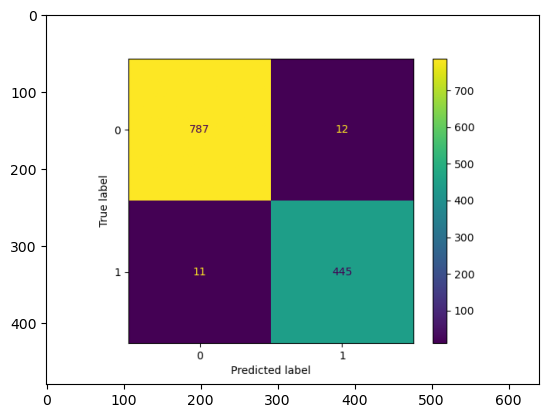

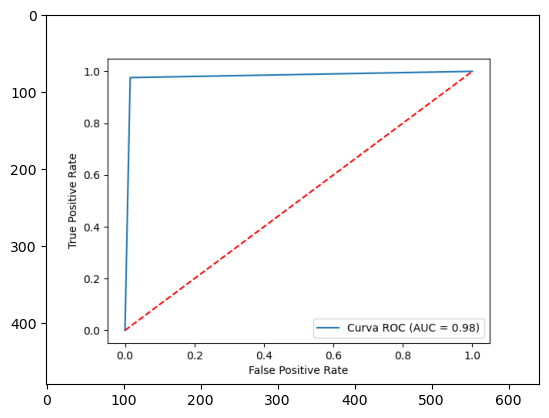

In [78]:
# Curva ROC y matriz de confusión para la regresión logística
model_lr_0 = LogisticRegression(C=1/hiperps[0,0], penalty="elasticnet", solver="saga", l1_ratio=hiperps[0,1], tol=1e-2, random_state=74)
metr_lr_0 = evalua_metodo(model_lr_0, X_train_stand, X_test_stand, y_train, y_test, ponds_train)

# Guarda y expone matriz de confusión
if os.path.exists('confusion_matrix_lr_0.png'):
    os.remove('confusion_matrix_lr_0.png')
os.rename('confusion_matrix.png', 'confusion_matrix_lr_0.png')
graph_cf_lr_0 = imread('confusion_matrix_lr_0.png')
plt.imshow(graph_cf_lr_0)
plt.show()

# Guarda y expone curva ROC
if os.path.exists('roc_curve_lr_0.png'):
    os.remove('roc_curve_lr_0.png')
os.rename('roc_curve.png', 'roc_curve_lr_0.png')
graph_rc_lr_0 = imread('roc_curve_lr_0.png')
plt.imshow(graph_rc_lr_0)
plt.show()

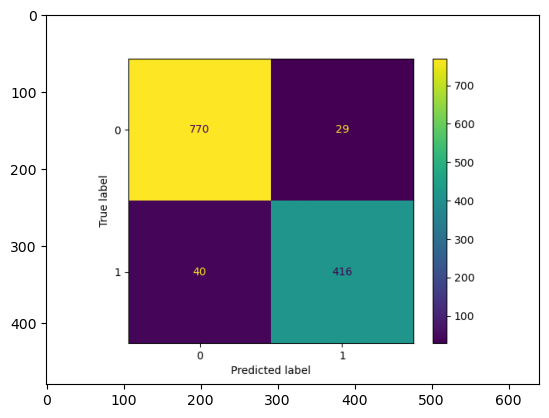

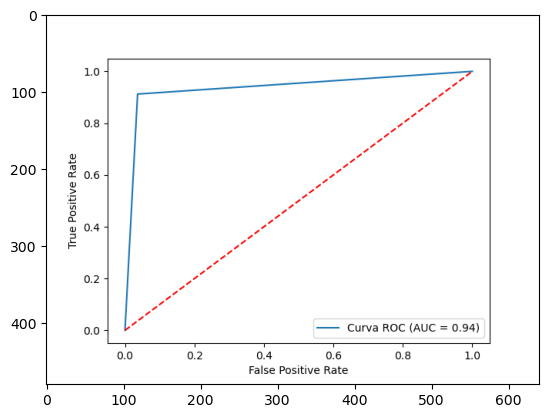

In [79]:
# Curva ROC y matriz de confusión para K vecinos más cercanos
model_knn = KNeighborsClassifier(n_neighbors=int(hiperps[1, 0]))
metr_knn = evalua_metodo(model_knn, X_train_stand, X_test_stand, y_train, y_test)

# Guarda y expone matriz de confusión
if os.path.exists('confusion_matrix_knn.png'):
    os.remove('confusion_matrix_knn.png')
os.rename('confusion_matrix.png', 'confusion_matrix_knn.png')
graph_cf_knn = imread('confusion_matrix_knn.png')
plt.imshow(graph_cf_knn)
plt.show()

# Guarda y expone curva ROC
if os.path.exists('roc_curve_knn.png'):
    os.remove('roc_curve_knn.png')
os.rename('roc_curve.png', 'roc_curve_knn.png')
graph_rc_knn = imread('roc_curve_knn.png')
plt.imshow(graph_rc_knn)
plt.show()

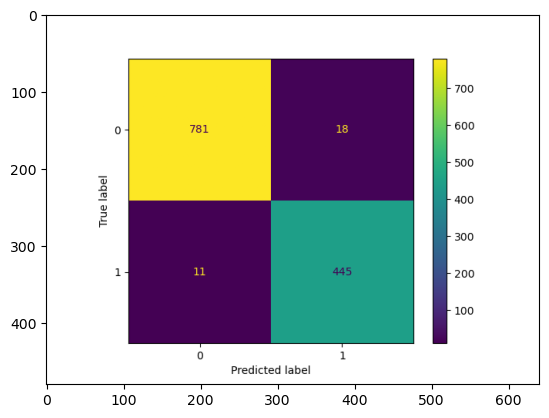

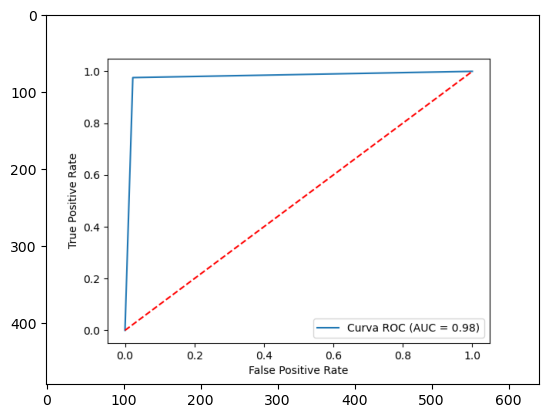

In [80]:
# Curva ROC y matriz de confusión para análisis discriminante lineal
model_lda = LinearDiscriminantAnalysis()
metr_lda = evalua_metodo(model_lda, X_train_stand, X_test_stand, y_train, y_test)

# Guarda y expone matriz de confusión
if os.path.exists('confusion_matrix_lda.png'):
    os.remove('confusion_matrix_lda.png')
os.rename('confusion_matrix.png', 'confusion_matrix_lda.png')
graph_cf_lda = imread('confusion_matrix_lda.png')
plt.imshow(graph_cf_lda)
plt.show()

# Guarda y expone curva ROC
if os.path.exists('roc_curve_lda.png'):
    os.remove('roc_curve_lda.png')
os.rename('roc_curve.png', 'roc_curve_lda.png')
graph_rc_lda = imread('roc_curve_lda.png')
plt.imshow(graph_rc_lda)
plt.show()

### Inciso 3

La técnica de validación cruzada implica elegir un número $K$ (lo estándar es $K=5$ o $K=10$), partir la muestra arbitrariamente en $K$ submuestras iguales, y ajustar el modelo en $K-1$ submuestras, para luego predecir en la submuestra excluida y computar el error de predicción. Esto se repite $K$ veces, alternando la muestra excluida, de manera de que cada una de las $K$ submuestras ocupa el rol de base de prueba una vez y base de entrenamiento $K-1$ veces. Luego de esto, se promedia el error de predicción para las $K$ submuestras.

Para elegir al hiperparámetro de regularización $\lambda$ por validación cruzada, se tomaría un conjunto de valores para $\lambda$ y, para cada uno de ellos, se aplicaría el método de validación cruzada previamente descrito (para algún $K$ escogido de antemano), utilizando $\lambda$ para el ajuste en cada iteración. Luego de esto se eligiría al $\lambda$ que genere el error de predicción promedio más bajo.

La razón para no utilizar al conjunto de prueba para la selección de $\lambda$ es análoga a la razón para no utilizarlo en la estimación. Los modelos que mejor se ajustan a la muestra en que son estimados a menudo no predicen bien fuera de ella debido al problema de _overfit_: es posible que se ajusten mejor por predecir mejor idiosincrasias de esa muestra en particular, que no son representativas del fenómeno bajo estudio en condiciones más generales. De la misma forma, hiperparámetros como $\lambda$ determinan en parte el ajuste del modelo, y existe un riesgo de _overfit_ debido a la posibilidad de que los $\lambda$'s que induzcan un mejor ajuste sean los que mejor se adaptan a captar variabilidad espuria o no generalizable de esa muestra, y no den lugar a ajustes que permitan predecir otros datos. La contribución de la base de prueba a solucionar ambos problemas es la misma: posibilitar la evaluación del desempeño predictivo de los modelos considerados en un conjunto de datos cuya información no fue utilizada por ellos. Utilizar la base de prueba para elegir $\lambda$ contradiría el propósito para el que emplea esta base, puesto que implicaría introducir información de la base de prueba en la determinación del ajuste del modelo. 

### Inciso 4

Un $K$ muy chico partir la muestra en submuestras más grandes (el tamaño de submuestras es $\frac{n}{K}$, y $n$ no varía), por lo que, en cada una de las $K$ iteraciones del proceso de predecir una submuestra tras ajustar el modelo en la unión de las demás submuestras, se tendrá un conjunto de prueba más grande y una muestra de entrenamiento más pequeña. Esto equivale a aumentar la cantidad de datos para evaluar, algo positivo para el propósito de estimar el error de predicción, dado que la Ley de los Grandes Números indica que (bajo cierto supuestos) el error promedio para una submuestra dada converge en probabilidad al verdadero error poblacional cuando el tamaño de cada submuestra tiende a infinito. El problema de esto es que se obtiene a costa de reducir la cantidad de observaciones de entrenamiento, y por lo tanto reducir la precisión de las estimaciones de los modelos ajustados en cada iteración (el error predictivo es función no solamente del modelo sino del tamaño de muestra de estimación, y será mayor para muestras más pequeñas, algo que modera el beneficio de tener una mejor estimación del mismo).

Este problema se reduce aumentando $K$, puesto que se aumenta de esa forma la cantidad de datos para estimar el modelo en cada iteración del proceso de validación cruzada. Sin embargo, esto se logra a costa de reducir la cantidad disponible para estimarlo, y por tanto permite tener una señal más inestable del desempeño predictivo del modelo. Con esto, el proceso de validación cruzada es más sensible a valores particulares, pudiendo haber instancias en que se penaliza excesivamente la falta de capacidad de predecir _outliers_, dado que éstos tendrán más influencia en el error promedio calculado para la submuestra que los contiene (por ser ésta más pequeña). En el caso extremo en que $K=n$, cada error de predicción "promedio" es simplemente el error de predicción para una observación en particular, y tomará valores sumamente altos para datos que se encuentra en las colas de la distribución de probabilidad de la variable dependiente $Y$  condicional en las independientes $X$.

En este último caso, el modelo se estimará $n$ veces, en cada iteración dejándose una sola observación de lado y prediciéndola en base al ajuste al modelo a las $n-1$ observaciones restantes.

### Inciso 5

In [81]:
# Se genera conjunto de lambdas en los que evaluar el desempeño de LASSO y Ridge
vals_lambda_1 = 10**np.linspace(-5,5,11)

In [82]:
# Se declara K a utilizar para K-Fold cross-validation
K_kfcv = 10

In [83]:
# Se corre la función evalua_config para LASSO y Ridge
mod_lr_lasso = LogisticRegression()
opt_lasso, errs_lasso, errors_lasso, coefs_lasso = evalua_config(mod_lr_lasso, X_train, y_train, vals_lambda_1, elastic_list=[1], neighbor_list='', pond=ponds_train, K_cv=K_kfcv)
mod_lr_ridge = LogisticRegression()
opt_ridge, errs_ridge, errors_ridge, coefs_ridge = evalua_config(mod_lr_ridge, X_train, y_train, vals_lambda_1, elastic_list=[0], neighbor_list='', pond=ponds_train, K_cv=K_kfcv)

# Se obtienen los lambdas óptimos y sus ECM correspondientes como escalares
lambda_opt_lasso = opt_lasso[0]
ecm_min_lasso = opt_lasso[2]
lambda_opt_ridge = opt_ridge[0]
ecm_min_ridge = opt_ridge[2]

print(f'El lambda elegido para LASSO es {lambda_opt_lasso:.0e}, y arroja un ECM (promedio entre particiones) de {ecm_min_lasso:.3f}.')
print(f'El lambda elegido para Ridge es {lambda_opt_ridge:.0e}, y arroja un ECM (promedio entre particiones) de {ecm_min_ridge:.3f}.')

C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

El lambda elegido para LASSO es 1e+02, y arroja un ECM (promedio entre particiones) de 0.027.
El lambda elegido para Ridge es 1e-02, y arroja un ECM (promedio entre particiones) de 0.026.


In [84]:
# Prepara los box-plots

# Se generan 2D arrays de np con los errores, para cada lambda
# Errores LASSO
errors_lasso_0 = [t[2:] for t in errors_lasso]
errors_lasso_1 = np.array(errors_lasso_0)
errors_lasso_2 = errors_lasso_1.T
errors_lasso_3 = errors_lasso_2.reshape(-1, errors_lasso_2.shape[-1])
# Errores Ridge
errors_ridge_0 = [t[2:] for t in errors_ridge]
errors_ridge_1 = np.array(errors_ridge_0)
errors_ridge_2 = errors_ridge_1.T
errors_ridge_3 = errors_ridge_2.reshape(-1, errors_ridge_2.shape[-1])

# Genera un vector de lambdas pero con notación científica (se consideró que se lee mejor el eje X del box-plot de esta forma)
vals_lambda_1_sci = [f"{val:.0e}" for val in vals_lambda_1]

C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\3615133643.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set(ticklabels=vals_lambda_1_sci)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\3615133643.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(vals_lambda_1_sci, rotation=45)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\3615133643.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10])


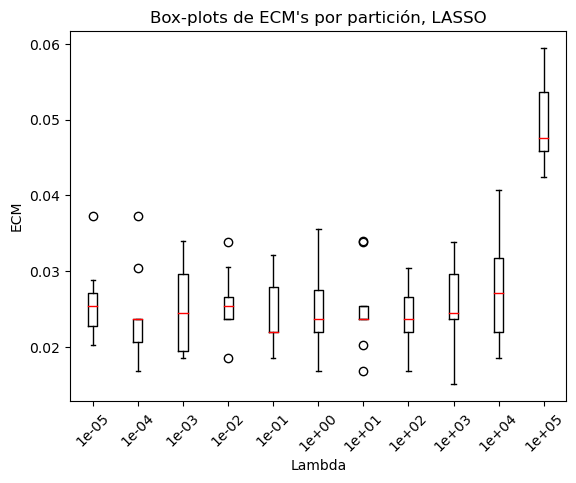

In [85]:
# Box-plot para LASSO

fig, ax = plt.subplots()
ax.xaxis.set(ticklabels=vals_lambda_1_sci)
ax.set_xticklabels(vals_lambda_1_sci, rotation=45)
ax.set(title="Box-plots de ECM's por partición, LASSO" , ylabel= "ECM", xlabel= "Lambda")
ax.boxplot(errors_lasso_3, widths=0.2, medianprops={'color': 'red'})
ax.set_yticklabels([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10])

plt.show()

C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\4007954102.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set(ticklabels=vals_lambda_1_sci)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\4007954102.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(vals_lambda_1_sci, rotation=45)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\4007954102.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10])


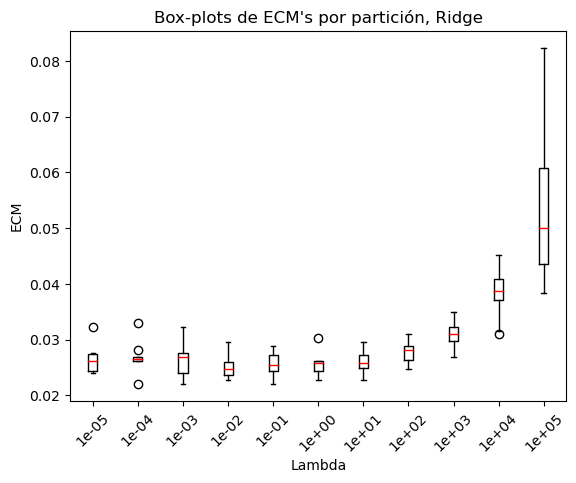

In [86]:
# Box-plot para Ridge

fig, ax = plt.subplots()
ax.xaxis.set(ticklabels=vals_lambda_1_sci)
ax.set_xticklabels(vals_lambda_1_sci, rotation=45)
ax.set(title="Box-plots de ECM's por partición, Ridge" , ylabel= "ECM", xlabel= "Lambda")
ax.boxplot(errors_ridge_3, widths=0.2, medianprops={'color': 'red'})
ax.set_yticklabels([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10])

plt.show()

In [87]:
# Genera cantidad de variables ignoradas por LASSO

# Inicializa array de cantidad de variables ignoradas
n_lambdas = len(vals_lambda_1)
ignor_0 = np.zeros((n_lambdas, K_kfcv), dtype=int)

# Llena l array de valores correspondientes a la cantidad de variables ignoradas, para cada valor de lambda y para partición de
# la muestra
for i in range(n_lambdas):
    for j in range(K_kfcv):
        ignor_0[i, j] = np.count_nonzero(coefs_lasso[i, j, :] == 0)
ignor_1 = ignor_0.T

C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\3606161866.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set(ticklabels=vals_lambda_1_sci)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\3606161866.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(vals_lambda_1_sci, rotation=45)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\3606161866.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,5,10,15,20,25,30,35,40])


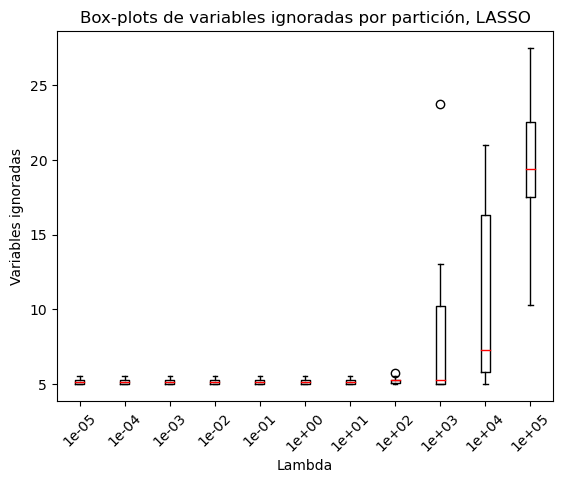

In [88]:
# Box-plot para cantidad de variables ignoradas por LASSO

fig, ax = plt.subplots()
ax.xaxis.set(ticklabels=vals_lambda_1_sci)
ax.set_xticklabels(vals_lambda_1_sci, rotation=45)
ax.set(title="Box-plots de variables ignoradas por partición, LASSO" , ylabel= "Variables ignoradas", xlabel= "Lambda")
ax.boxplot(ignor_1, widths=0.2, medianprops={'color': 'red'})
ax.set_yticklabels([0,5,10,15,20,25,30,35,40])

plt.show()

### Inciso 6

In [89]:
# Matriz con los coeficientes, para cada partición, correspondiente al lambda óptimo
lambda_opt_ind = np.where(vals_lambda_1 == lambda_opt_lasso)[0]
coefs_opt = coefs_lasso[lambda_opt_ind, :, :]
coefs_opt = coefs_opt.squeeze()
coefs_opt.shape

# Lista de 
coefs_desc = []

# Iterate through each row (observation) in vars_desc_opt
for row in range(K_kfcv):
    coefs_desc_part = [col for i, col in enumerate(X_train.columns) if coefs_opt[row,i] == 0]
    coefs_desc.append(coefs_desc_part)

coefs_desc

[['IV4_7',
  'IV6_3',
  'IV10_3',
  'DECIFR_12',
  'RDECIFR_12',
  'GDECIFR_12.0',
  'ADECIFR_12',
  'DECCFR_12',
  'RDECCFR_12',
  'GDECCFR_12.0',
  'ADECCFR_12',
  'VII1_1_5',
  'VII1_1_99',
  'VII1_2_6',
  'VII1_2_8',
  'VII1_2_96',
  'VII2_2_97',
  'VII2_3_2',
  'VII2_3_3',
  'VII2_3_45',
  'VII2_3_98',
  'VII2_4_5',
  'VII2_4_6',
  'H15_2',
  'PP02C8_1',
  'PP02E_1',
  'PP02E_2',
  'DECOCUR_12',
  'RDECOCUR_12',
  'GDECOCUR_12.0',
  'ADECOCUR_12',
  'DECINDR_12',
  'DECINDR_13',
  'RDECINDR_12',
  'RDECINDR_13',
  'GDECINDR_6.0',
  'GDECINDR_12.0',
  'GDECINDR_13.0',
  'ADECINDR_12',
  'ADECINDR_13',
  'Constante'],
 ['IV4_7',
  'IV6_3',
  'IV10_3',
  'DECIFR_12',
  'RDECIFR_12',
  'GDECIFR_12.0',
  'ADECIFR_12',
  'DECCFR_12',
  'RDECCFR_12',
  'GDECCFR_12.0',
  'ADECCFR_12',
  'VII1_1_5',
  'VII1_1_99',
  'VII1_2_6',
  'VII1_2_8',
  'VII1_2_96',
  'VII2_2_97',
  'VII2_3_2',
  'VII2_3_3',
  'VII2_3_45',
  'VII2_3_98',
  'VII2_4_5',
  'VII2_4_6',
  'H15_2',
  'PP02C8_1',
  'PP02E_

### Inciso 7

In [90]:
# Se comparan los ECM promedio de las particiones, obtenidos en el inciso 5
print('ECMs: se obtuvo',ecm_min_lasso,'con LASSO, y',ecm_min_ridge,'con Ridge')

ECMs: se obtuvo 0.02733531254383094 con LASSO, y 0.02562532142690168 con Ridge


In [91]:
# Se obtienen los ECM ajustando los modelos en toda la muestra.

# Se corre evalua_metodo para LASSO
model_lr_1 = LogisticRegression(C=1/lambda_opt_lasso, penalty="l1", solver="saga", tol=1e-2, random_state=74)
metr_lr_1 = evalua_metodo(model_lr_1, X_train_stand, X_test_stand, y_train, y_test, ponds_train)

# Guarda matriz de confusión para LASSO 
if os.path.exists('confusion_matrix_lr_1.png'):
    os.remove('confusion_matrix_lr_1.png')
os.rename('confusion_matrix.png', 'confusion_matrix_lr_1.png')
graph_cf_lr_1 = imread('confusion_matrix_lr_1.png')

# Guarda curva ROC para LASSO
if os.path.exists('roc_curve_lr_1.png'):
    os.remove('roc_curve_lr_1.png')
os.rename('roc_curve.png', 'roc_curve_lr_1.png')
graph_rc_lr_1 = imread('roc_curve_lr_1.png')

# Se corre evalua_metodo para Ridge
model_lr_2 = LogisticRegression(C=1/lambda_opt_ridge, penalty="l2", solver="saga", tol=1e-2, random_state=74)
metr_lr_2 = evalua_metodo(model_lr_2, X_train_stand, X_test_stand, y_train, y_test, ponds_train)

# Guarda matriz de confusión para Ridge
if os.path.exists('confusion_matrix_lr_2.png'):
    os.remove('confusion_matrix_lr_2.png')
os.rename('confusion_matrix.png', 'confusion_matrix_lr_2.png')
graph_cf_lr_2 = imread('confusion_matrix_lr_2.png')

# Guarda curva ROC para Ridge
if os.path.exists('roc_curve_lr_2.png'):
    os.remove('roc_curve_lr_2.png')
os.rename('roc_curve.png', 'roc_curve_lr_2.png')
graph_rc_lr_2 = imread('roc_curve_lr_2.png')

print('ECMs: se obtuvo',metr_lr_1['ECM'],'con LASSO, y',metr_lr_2['ECM'],'con Ridge')

C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


ECMs: se obtuvo 0.023107569721115537 con LASSO, y 0.020717131474103586 con Ridge


### Inciso 8

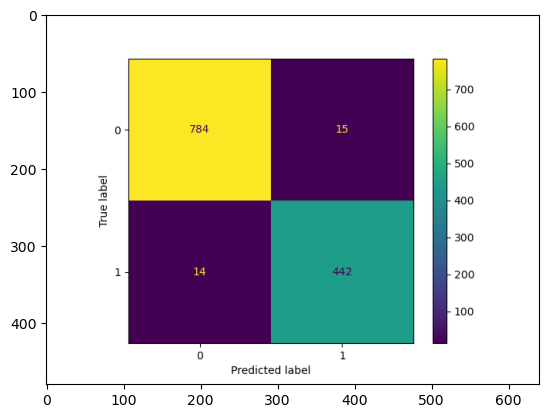

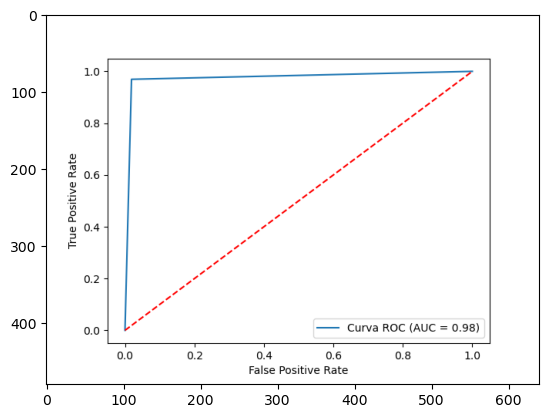

AUC: 0.975
Accuracy: 0.977
VPP: 0.967
VPN: 0.982
ECM: 0.023


In [92]:
# Matriz de confusión y curvas ROC para el ajuste con LASSO

plt.imshow(graph_cf_lr_1)
plt.show()

plt.imshow(graph_rc_lr_1)
plt.show()

# Muestra las métricas de desempeño
for met in ['AUC', 'Accuracy', 'VPP', 'VPN', 'ECM']:
    print(f"{met}: {metr_lr_1[met]:.3f}")

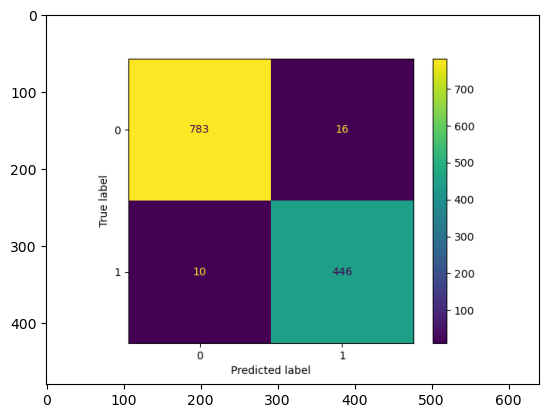

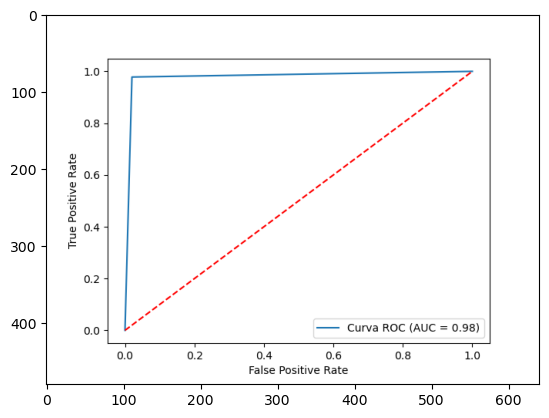

AUC: 0.979
Accuracy: 0.979
VPP: 0.965
VPN: 0.987
ECM: 0.021


In [93]:
# Matriz de confusión y curvas ROC para el ajuste con LASSO

plt.imshow(graph_cf_lr_2)
plt.show()

plt.imshow(graph_rc_lr_2)
plt.show()

# Muestra las métricas escalares de desempeño
for met in ['AUC', 'Accuracy', 'VPP', 'VPN', 'ECM']:
    print(f"{met}: {metr_lr_2[met]:.3f}")

### Inciso 9

# REVISAR MODELO ELEGIDO Y COMENTARIO SOBRE ESTANDARIZACIÓN

In [94]:
# Dado que la elección del método se hizo sobre la base de ajustes realizados con muestras estandarizadas, es razonable 

In [95]:
# Preparativos para la predicción

# Se genera una base para la predicción, igual a norespondieron pero con las mismas variables que X_stand
noresp_pred = norespondieron.drop(columns=['CH05','CODUSU', 'ANO4','TRIMESTRE','NRO_HOGAR','COMPONENTE','MAS_500','REGION','Sexo','Edad','PONDERA','PONDII','PONDIIO','PONDIH','REALIZADA'])
noresp_pred['Constante']=1

# Se estandariza X y también la base noresp_pred recientemente creada
sc = StandardScaler()
X_stand = pd.DataFrame(sc.fit_transform(X),index=X.index, columns=X.columns)
noresp_pred_stand = pd.DataFrame(sc.fit_transform(noresp_pred),index=noresp_pred.index, columns=noresp_pred.columns)

In [96]:
# Se ajusta el modelo elegido
model_lr_1.fit(X_train_stand, y_train, sample_weight=ponds_train)

# Se genera la predicción para la muestra de prueba
pobre_pred_noresp = model_lr_1.predict(noresp_pred_stand)

# Se suma la variable de pobres predichos a norespondieron
norespondieron['pobre_pred']=pobre_pred_noresp

print(f'De los {len(pobre_pred_noresp)} individuos provenientes de hogares que no respondieron su ingreso familiar, se '
      f'predice que {np.sum(pobre_pred_noresp)} son pobres.')

De los 2959 individuos provenientes de hogares que no respondieron su ingreso familiar, se predice que 995 son pobres.


C:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\31100879.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron['pobre_pred']=pobre_pred_noresp


# COMENTAR

In [97]:
# Se crea una variable que identifica a los hogares, a partir de CODUSU y NRO_HOGAR
norespondieron['id_hogar'] = norespondieron['CODUSU'].astype(str) + '_' + norespondieron['NRO_HOGAR'].astype(str)

# Se construye otro dataframe con el porcentaje de pobres predichos por hogar
noresp_hogares = norespondieron.groupby('id_hogar').mean().reset_index()

# Se clasifica a los hogares como pobres o no pobres en función del porcentaje predicho de individuos pobres
noresp_hogares['pobre_pred'] = noresp_hogares['pobre_pred'].apply(lambda x: 1 if x >= 0.5 else 0)
prop_pobres_pred = np.mean(noresp_hogares['pobre_pred'])*100

print(f'Nuestro método predice que, en la submuestra de los hogares que no respondieron su ingreso familiar, un '
      f'{prop_pobres_pred:.2f}% son pobres.')

Nuestro método predice que, en la submuestra de los hogares que no respondieron su ingreso familiar, un 27.06% son pobres.


C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\2491713334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron['id_hogar'] = norespondieron['CODUSU'].astype(str) + '_' + norespondieron['NRO_HOGAR'].astype(str)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_14168\2491713334.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  noresp_hogares = norespondieron.groupby('id_hogar').mean().reset_index()


In [98]:
# Para mejor comparación, porcentaje no ponderado de hogares pobres en la base "respondieron"
prop_pobres = np.mean(resp_hogares['pobre'])*100
print(f'Un {prop_pobres:.2f}% de los hogares que sí respondieron son pobres.')

Un 25.34% de los hogares que sí respondieron son pobres.


In [99]:
b = time.time()
c = b - a
d = c/60
print(d)

17.697020995616914
